IMPORTING LIBRARIES

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency,f_oneway,stats,shapiro,kstest,kruskal,wilcoxon
from datetime import datetime

IMPORT CSV

In [3]:
df=pd.read_csv('SaaS-Sales.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,9/6/2022,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN
freq,NaN,14,38,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,1.123898e+04,NaN,NaN,NaN,NaN,NaN,NaN,29.719388,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.duplicated().sum()

0

NO NULL DATA AND DUPLICATED DATA

In [9]:
pd.set_option('display.max_colwidth',None)
listunique=[]
for col in df.columns:
    listunique.append([col,df[col].nunique(),df[col].unique()])
tableunique = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Sample'],data=listunique)
tableunique

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

EXTRACT TIME INFORMATIONS
for day of week its 0 for Monday until 6 for Sunday
for day of month its 1 - 30 or 31 (for date)
for month its 1 for Janurary until 12 for December
for year...

In [4]:
df['extractdate']=pd.to_datetime(df['Order Date'])
df['day_of_week']=df['extractdate'].dt.dayofweek
df['day_of_month']=df['extractdate'].dt.day
df['month']=df['extractdate'].dt.month
df['year']=df['extractdate'].dt.year

In [11]:
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,License,Sales,Quantity,Discount,Profit,extractdate,day_of_week,day_of_month,month,year
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11-09,2,9,11,2022
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11-09,2,9,11,2022
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06-13,0,13,6,2022
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10-11,0,11,10,2021
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10-11,0,11,10,2021


SALES DISTRIBUTION

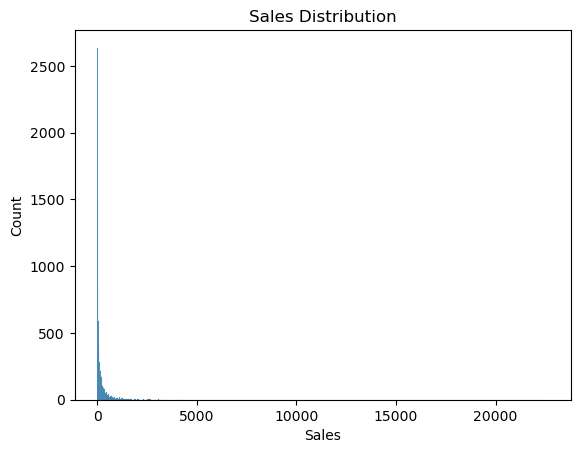

In [12]:
sns.histplot(df['Sales'])
plt.title("Sales Distribution")
plt.show()

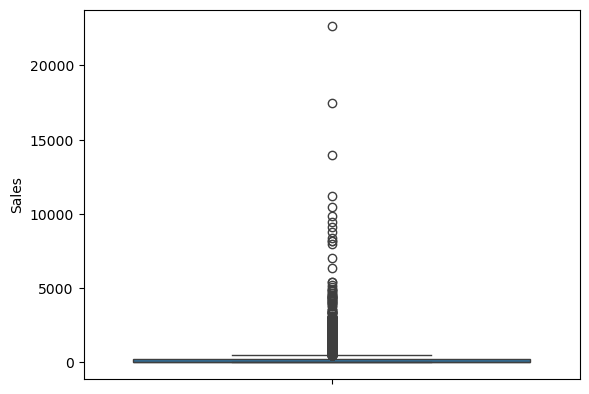

In [13]:
sns.boxplot(df['Sales'])
plt.show()

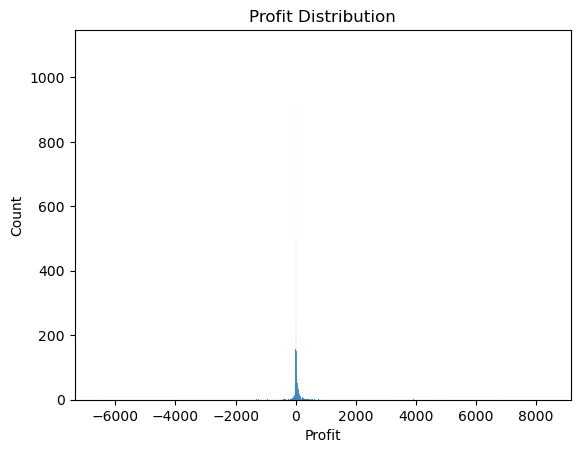

In [14]:
sns.histplot(df['Profit'])
plt.title("Profit Distribution")
plt.show()

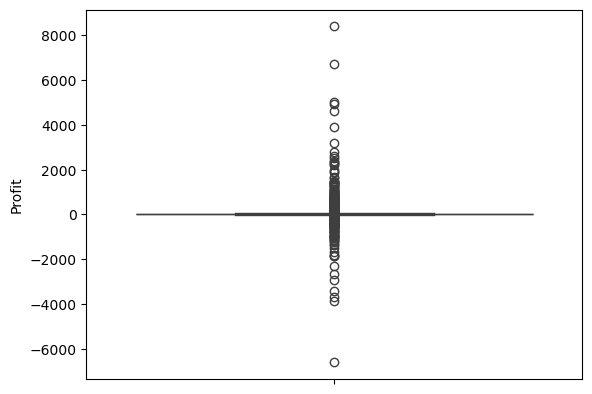

In [15]:
sns.boxplot(df['Profit'])
plt.show()

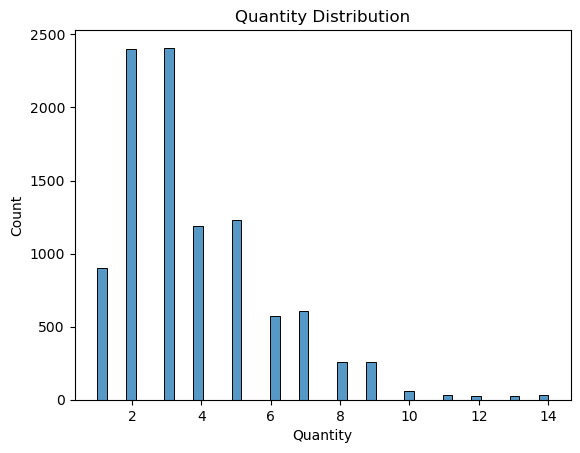

In [16]:
sns.histplot(df['Quantity'])
plt.title("Quantity Distribution")
plt.show()

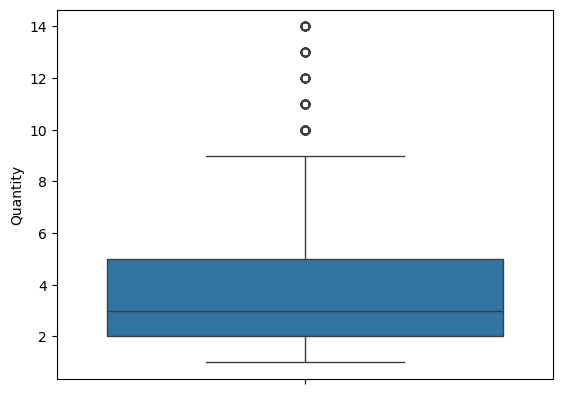

In [17]:
sns.boxplot(df['Quantity'])
plt.show()

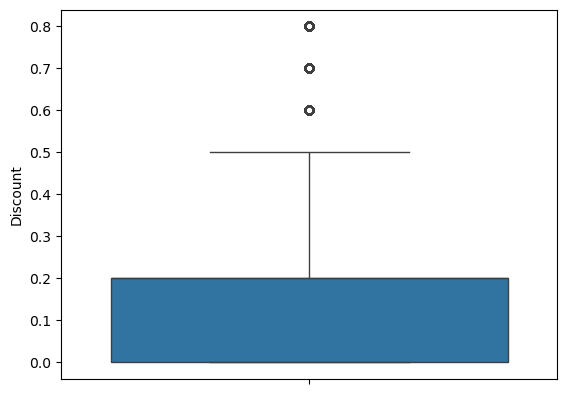

In [18]:
sns.boxplot(df['Discount'])
plt.show()

OUTLIERS DETECTED

Implementing data segmentation : High Outlier , Normal Data , Low Outlier , Negative Profit

In [19]:
Q1_sales=df['Sales'].quantile(0.25)
Q3_sales=df['Sales'].quantile(0.75)
IQR_sales=Q3_sales - Q1_sales
upper_bound_sales=Q3_sales+1.5*IQR_sales
lower_bound_sales=Q1_sales-1.5*IQR_sales
Q1_profit=df['Profit'].quantile(0.25)
Q3_profit=df['Profit'].quantile(0.75)
IQR_profit=Q3_profit-Q1_profit
upper_bound_profit=Q3_profit+1.5*IQR_profit
lower_bound_profit=Q1_profit-1.5*IQR_profit
Q1_discount=df['Discount'].quantile(0.25)
Q3_discount=df['Discount'].quantile(0.75)
IQR_discount=Q3_discount-Q1_discount
upper_bound_discount=Q3_discount+1.5*IQR_discount
lower_bound_discount=Q1_discount-1.5*IQR_discount
Q1_quantity=df['Quantity'].quantile(0.25)
Q3_quantity=df['Quantity'].quantile(0.75)
IQR_quantity=Q3_quantity-Q1_quantity
upper_bound_quantity=Q3_quantity+1.5*IQR_quantity
lower_bound_quantity=Q1_quantity-1.5*IQR_quantity
df['Subdivide']='Normal'
df.loc[(df['Sales']>upper_bound_sales)|(df['Profit']>upper_bound_profit)|(df['Discount']>upper_bound_discount)|(df['Quantity']>upper_bound_quantity),'Subdivide']='High Outlier'
df.loc[(df['Sales']<lower_bound_sales)|(df['Profit']<lower_bound_profit)|(df['Discount']<lower_bound_discount)|(df['Quantity']<lower_bound_quantity),'Subdivide']='Low Outlier'
df.loc[df['Profit']<0,'Subdivide']='Negative Profit'
print(df['Subdivide'].value_counts())

Subdivide
Normal             6584
Negative Profit    1871
High Outlier       1539
Name: count, dtype: int64


In [20]:
#Sales Distribution Analysis
mode_sales_normal=df[df['Subdivide']=='Normal']['Sales'].mode()[0]
max_sales_normal=df[df['Subdivide']=='Normal']['Sales'].max()
min_sales_normal=df[df['Subdivide']=='Normal']['Sales'].min()
mode_sales_high=df[df['Subdivide']=='High Outlier']['Sales'].mode()[0]
max_sales_high=df[df['Subdivide']=='High Outlier']['Sales'].max()
min_sales_high=df[df['Subdivide']=='High Outlier']['Sales'].min()
mode_sales_negative=df[df['Subdivide']=='Negative Profit']['Sales'].mode()[0]
max_sales_negative=df[df['Subdivide']=='Negative Profit']['Sales'].max()
min_sales_negative=df[df['Subdivide']=='Negative Profit']['Sales'].min()
print(f"For normal segment the mode of the sales is {mode_sales_normal}, the max sales is {max_sales_normal}, and the min sales is {min_sales_normal}")
print(f"For high outlier segment the mode of the sales is {mode_sales_high}, the max sales is {max_sales_high}, and the min sales is {min_sales_high}")
print(f"For negative profit segment the mode of the sales is {mode_sales_negative}, the max sales is {max_sales_negative}, and the min sales is {min_sales_negative}")

For normal segment the mode of the sales is 12.96, the max sales is 496.86, and the min sales is 0.99
For high outlier segment the mode of the sales is 166.44, the max sales is 17499.95, and the min sales is 21.5
For negative profit segment the mode of the sales is 2.946, the max sales is 22638.48, and the min sales is 0.444


In [21]:
#Profit Distribution Analysis
mode_profit_normal=df[df['Subdivide']=='Normal']['Profit'].mode()[0]
max_profit_normal=df[df['Subdivide']=='Normal']['Profit'].max()
min_profit_normal=df[df['Subdivide']=='Normal']['Profit'].min()
mode_profit_high=df[df['Subdivide']=='High Outlier']['Profit'].mode()[0]
max_profit_high=df[df['Subdivide']=='High Outlier']['Profit'].max()
min_profit_high=df[df['Subdivide']=='High Outlier']['Profit'].min()
mode_profit_negative=df[df['Subdivide']=='Negative Profit']['Profit'].mode()[0]
max_profit_negative=df[df['Subdivide']=='Negative Profit']['Profit'].max()
min_profit_negative=df[df['Subdivide']=='Negative Profit']['Profit'].min()
print(f"For normal segment the mode of the profit is {mode_profit_normal}, the max profit is {max_profit_normal}, and the min profit is {min_profit_normal}")
print(f"For high outlier segment the mode of the profit is {mode_profit_high}, the max profit is {max_profit_high}, and the min profit is {min_profit_high}")
print(f"For negative profit segment the mode of the profit is {mode_profit_negative}, the max profit is {max_profit_negative}, and the min profit is {min_profit_negative}")

For normal segment the mode of the profit is 0.0, the max profit is 70.722, and the min profit is 0.0
For high outlier segment the mode of the profit is 0.0, the max profit is 8399.976, and the min profit is 0.0
For negative profit segment the mode of the profit is -29.4368, the max profit is -0.0895, and the min profit is -6599.978


In [22]:
#Discount Distribution Analysis
mode_discount_normal=df[df['Subdivide']=='Normal']['Discount'].mode()[0]
max_discount_normal=df[df['Subdivide']=='Normal']['Discount'].max()
min_discount_normal=df[df['Subdivide']=='Normal']['Discount'].min()
mode_discount_high=df[df['Subdivide']=='High Outlier']['Discount'].mode()[0]
max_discount_high=df[df['Subdivide']=='High Outlier']['Discount'].max()
min_discount_high=df[df['Subdivide']=='High Outlier']['Discount'].min()
mode_discount_negative=df[df['Subdivide']=='Negative Profit']['Discount'].mode()[0]
max_discount_negative=df[df['Subdivide']=='Negative Profit']['Discount'].max()
min_discount_negative=df[df['Subdivide']=='Negative Profit']['Discount'].min()
print(f"For normal segment the mode of the discount is {mode_discount_normal}, the max discount is {max_discount_normal}, and the min discount is {min_discount_normal}")
print(f"For high outlier segment the mode of the discount is {mode_discount_high}, the max discount is {max_discount_high}, and the min discount is {min_discount_high}")
print(f"For negative profit segment the mode of the discount is {mode_discount_negative}, the max discount is {max_discount_negative}, and the min discount is {min_discount_negative}")

For normal segment the mode of the discount is 0.0, the max discount is 0.4, and the min discount is 0.0
For high outlier segment the mode of the discount is 0.0, the max discount is 0.4, and the min discount is 0.0
For negative profit segment the mode of the discount is 0.2, the max discount is 0.8, and the min discount is 0.1


In [23]:
#Quantity Distribution Analysis
mode_quantity_normal=df[df['Subdivide']=='Normal']['Quantity'].mode()[0]
max_quantity_normal=df[df['Subdivide']=='Normal']['Quantity'].max()
min_quantity_normal=df[df['Subdivide']=='Normal']['Quantity'].min()
mode_quantity_high=df[df['Subdivide']=='High Outlier']['Quantity'].mode()[0]
max_quantity_high=df[df['Subdivide']=='High Outlier']['Quantity'].max()
min_quantity_high=df[df['Subdivide']=='High Outlier']['Quantity'].min()
mode_quantity_negative=df[df['Subdivide']=='Negative Profit']['Quantity'].mode()[0]
max_quantity_negative=df[df['Subdivide']=='Negative Profit']['Quantity'].max()
min_quantity_negative=df[df['Subdivide']=='Negative Profit']['Quantity'].min()
print(f"For normal segment the mode of the quantity is {mode_quantity_normal}, the max quantity is {max_quantity_normal}, and the min quantity is {min_quantity_normal}")
print(f"For high outlier segment the mode of the quantity is {mode_quantity_high}, the max quantity is {max_quantity_high}, and the min quantity is {min_quantity_high}")
print(f"For negative profit segment the mode of the quantity is {mode_quantity_negative}, the max quantity is {max_quantity_negative}, and the min quantity is {min_quantity_negative}")

For normal segment the mode of the quantity is 2, the max quantity is 9, and the min quantity is 1
For high outlier segment the mode of the quantity is 3, the max quantity is 14, and the min quantity is 1
For negative profit segment the mode of the quantity is 2, the max quantity is 14, and the min quantity is 1


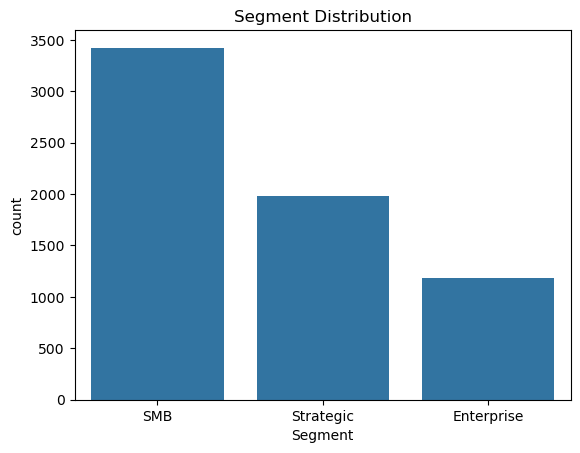

In [24]:
sns.countplot(x='Segment',data=df[df['Subdivide']=='Normal'])
plt.title("Segment Distribution")
plt.show()

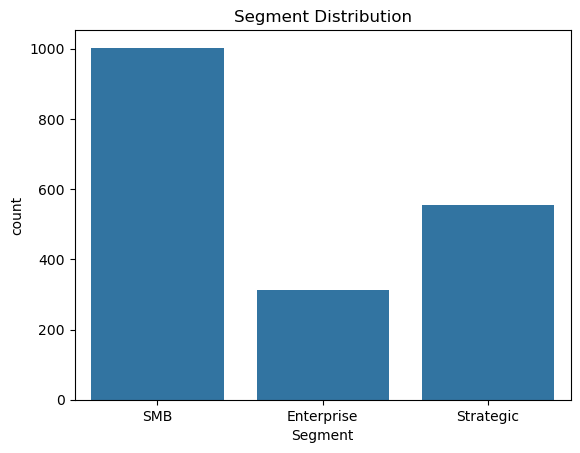

In [25]:
sns.countplot(x='Segment',data=df[df['Subdivide']=='Negative Profit'])
plt.title("Segment Distribution")
plt.show()

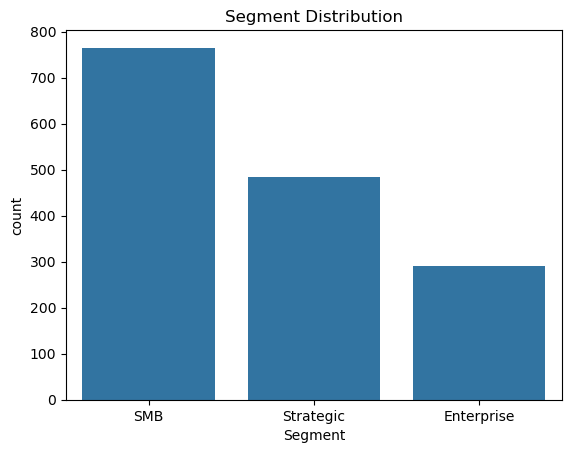

In [26]:
sns.countplot(x='Segment',data=df[df['Subdivide']=='High Outlier'])
plt.title("Segment Distribution")
plt.show()

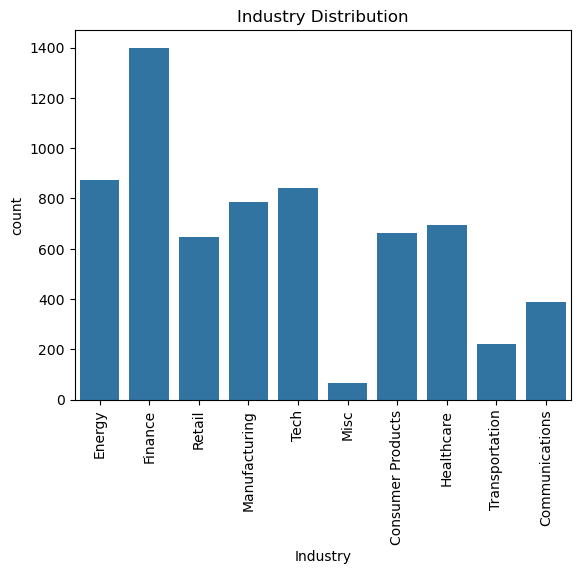

In [27]:
sns.countplot(x='Industry',data=df[df['Subdivide']=='Normal'])
plt.title("Industry Distribution")
plt.xticks(rotation=90)
plt.show()

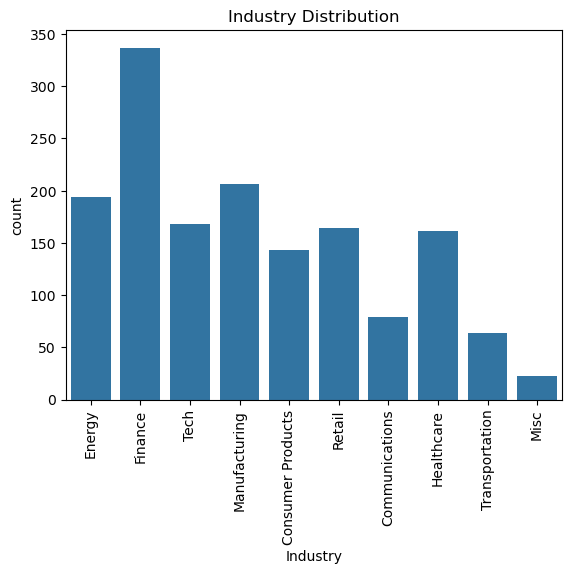

In [28]:
sns.countplot(x='Industry',data=df[df['Subdivide']=='High Outlier'])
plt.title("Industry Distribution")
plt.xticks(rotation=90)
plt.show()

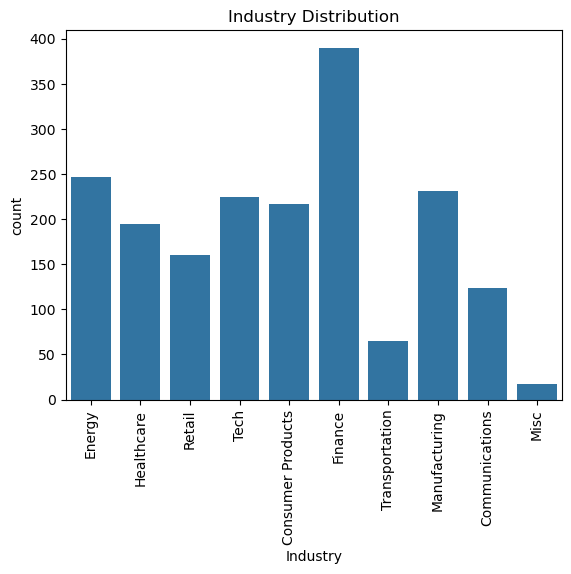

In [29]:
sns.countplot(x='Industry',data=df[df['Subdivide']=='Negative Profit'])
plt.title("Industry Distribution")
plt.xticks(rotation=90)
plt.show()

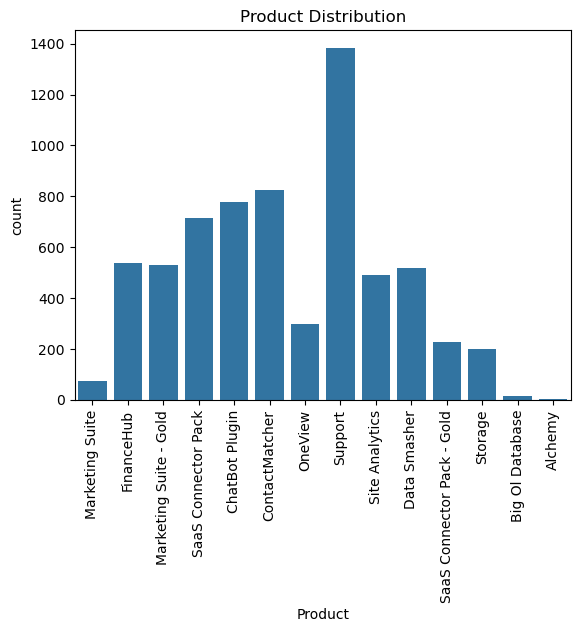

In [30]:
sns.countplot(x='Product',data=df[df['Subdivide']=='Normal'])
plt.title("Product Distribution")
plt.xticks(rotation=90)
plt.show()

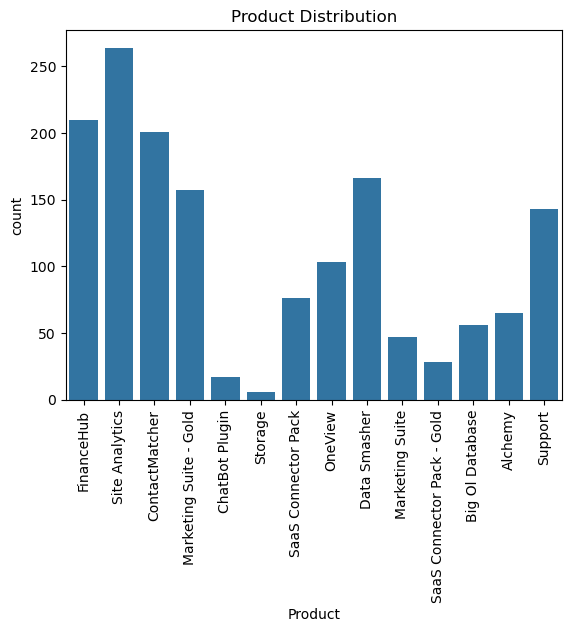

In [31]:
sns.countplot(x='Product',data=df[df['Subdivide']=='High Outlier'])
plt.title("Product Distribution")
plt.xticks(rotation=90)
plt.show()

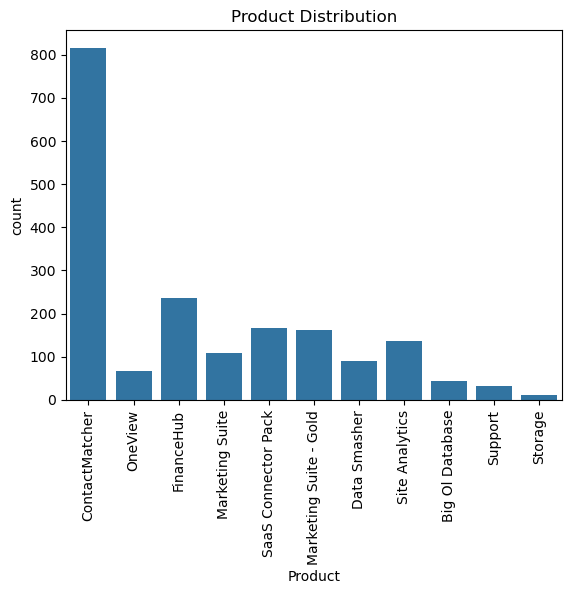

In [32]:
sns.countplot(x='Product',data=df[df['Subdivide']=='Negative Profit'])
plt.title("Product Distribution")
plt.xticks(rotation=90)
plt.show()

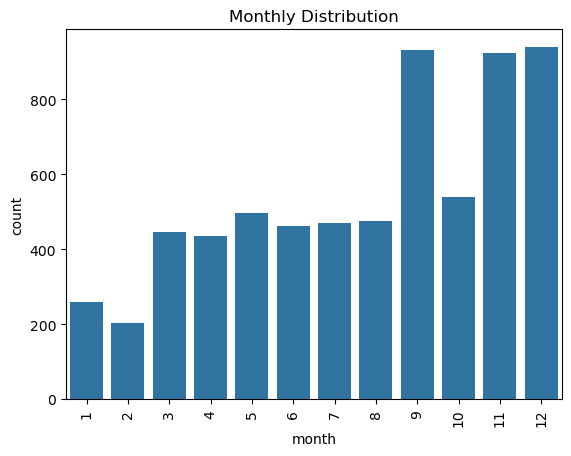

In [33]:
sns.countplot(x='month',data=df[df['Subdivide']=='Normal'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

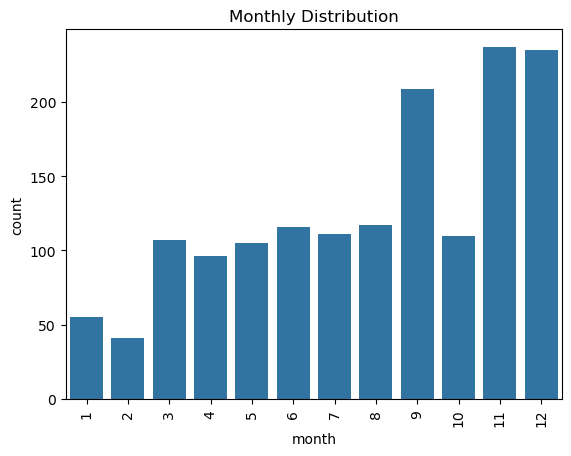

In [34]:
sns.countplot(x='month',data=df[df['Subdivide']=='High Outlier'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

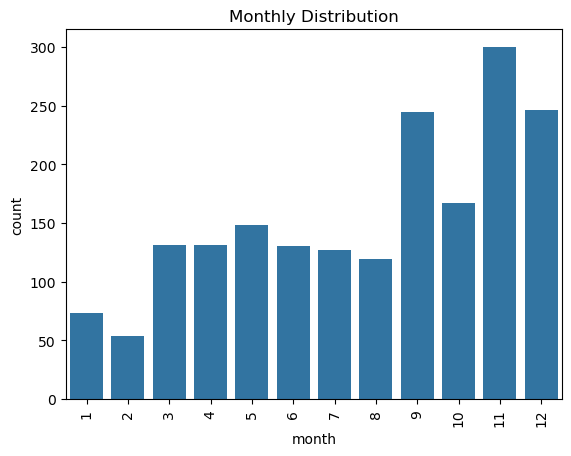

In [35]:
sns.countplot(x='month',data=df[df['Subdivide']=='Negative Profit'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

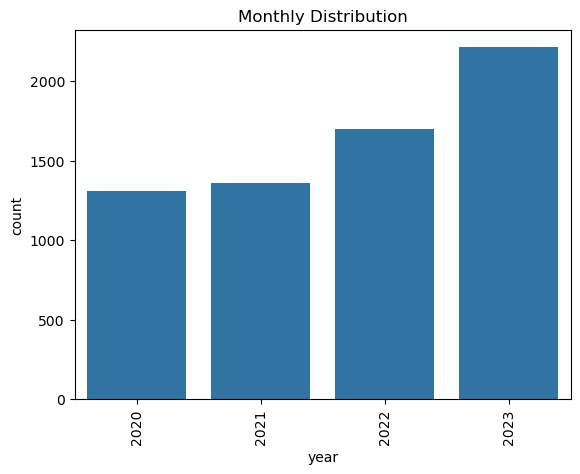

In [36]:
sns.countplot(x='year',data=df[df['Subdivide']=='Normal'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

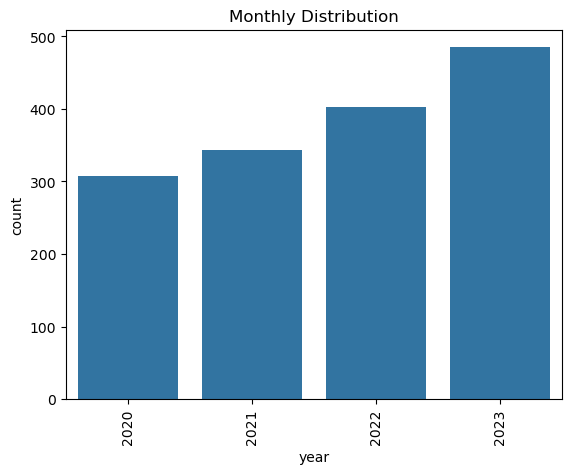

In [37]:
sns.countplot(x='year',data=df[df['Subdivide']=='High Outlier'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

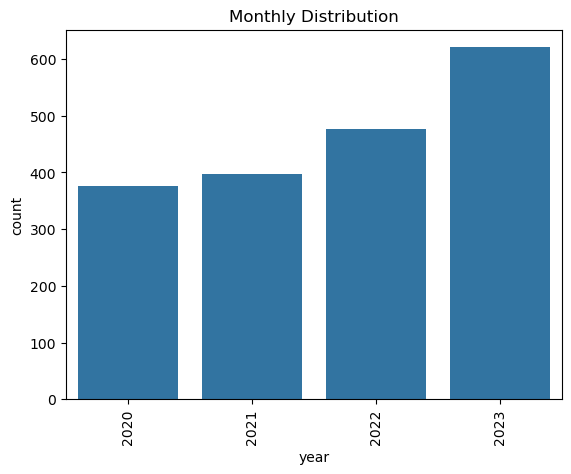

In [38]:
sns.countplot(x='year',data=df[df['Subdivide']=='Negative Profit'])
plt.title("Monthly Distribution")
plt.xticks(rotation=90)
plt.show()

DISTRIBUTION ANALYSIS

For normal segment the mode of the sales is 12.96, the max sales is 496.86, and the min sales is 0.99
For high outlier segment the mode of the sales is 166.44, the max sales is 17499.95, and the min sales is 21.5
For negative profit segment the mode of the sales is 2.946, the max sales is 22638.48, and the min sales is 0.444

For normal segment the mode of the profit is 0.0, the max profit is 70.722, and the min profit is 0.0
For high outlier segment the mode of the profit is 0.0, the max profit is 8399.976, and the min profit is 0.0
For negative profit segment the mode of the profit is -29.4368, the max profit is -0.0895, and the min profit is -6599.978

For normal segment the mode of the discount is 0.0, the max discount is 0.4, and the min discount is 0.0
For high outlier segment the mode of the discount is 0.0, the max discount is 0.4, and the min discount is 0.0
For negative profit segment the mode of the discount is 0.2, the max discount is 0.8, and the min discount is 0.1

For normal segment the mode of the quantity is 2, the max quantity is 9, and the min quantity is 1
For high outlier segment the mode of the quantity is 3, the max quantity is 14, and the min quantity is 1
For negative profit segment the mode of the quantity is 2, the max quantity is 14, and the min quantity is 1

Segment Distribution: SMB > Strategic > Enterprise for all subdivided data

Industry Distribution: Finance > Energy > Tech > Manufacturing > Healthcare for normal ; Finance > Manufacturing > Energy > Tech > Retail for high outlier ; Finance > Energy > Manufacturing > Tech > Consumer Products for negative profit

Product Distribution: Support > ContactMatcher > ChatBot Plugin > SaaS Connector Pack > FinanceHub for normal ; Site Analytics > FinanceHub > ContactMatcher > Data Smasher > Marketing Suite - Gold for high outlier ; ContactMatcher > FinanceHub > SaaS Connector Pack > Marketing Suite - Gold > Site Analytics for negative profit

Month Distribution: End of year has more count

Year Distribution: Increase as the year increase

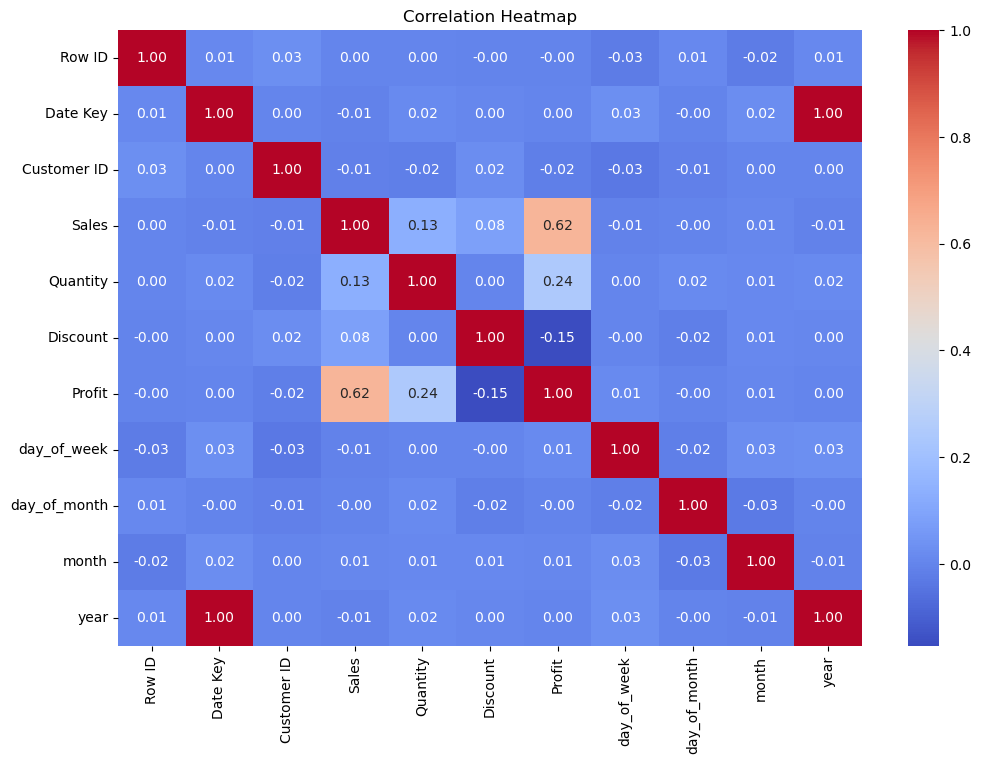

In [39]:
df_normal=df[df['Subdivide']=='Normal']
corr_matrix = df_normal.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

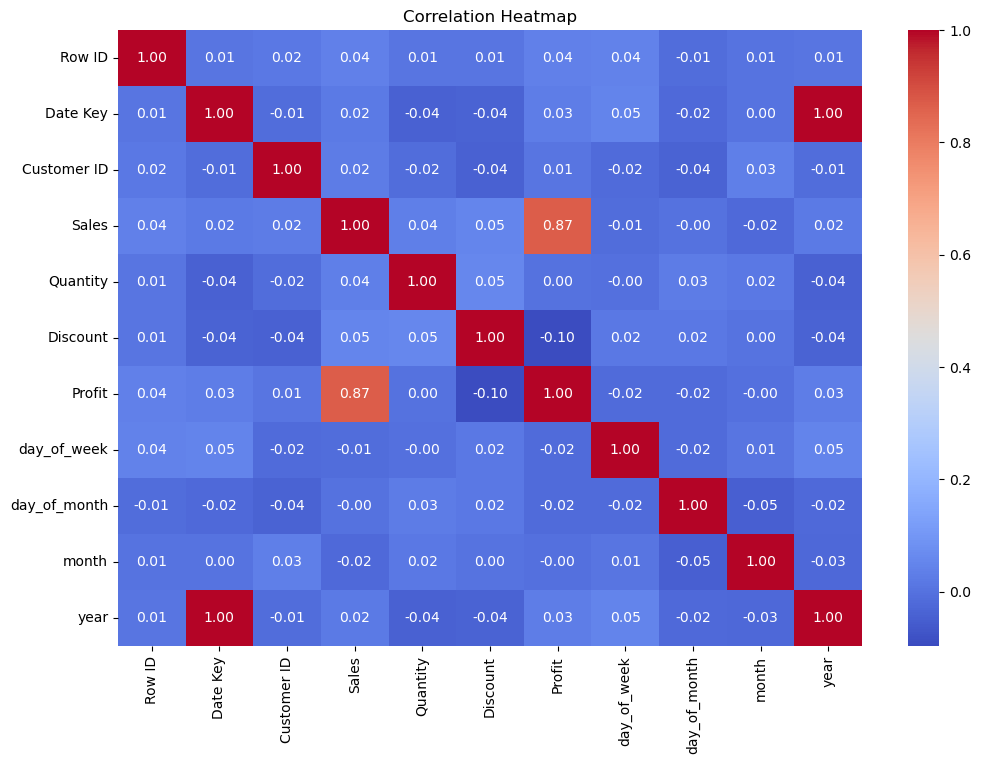

In [40]:
df_highoutlier=df[df['Subdivide']=='High Outlier']
corr_matrix = df_highoutlier.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

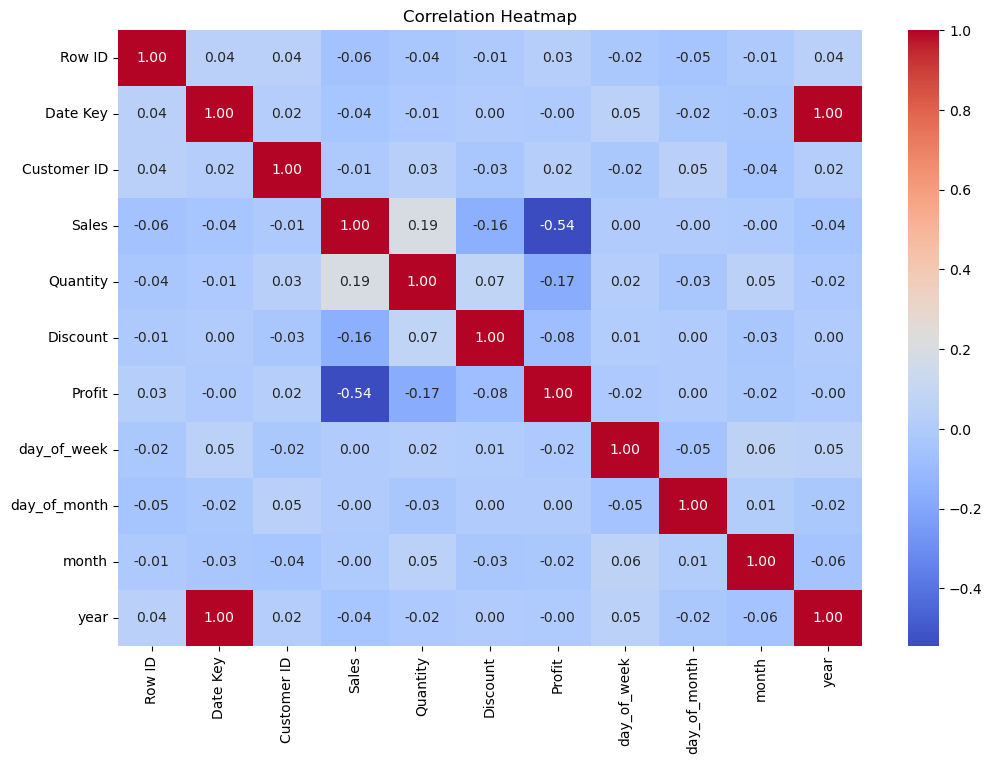

In [41]:
df_negativeprofit=df[df['Subdivide']=='Negative Profit']
corr_matrix = df_negativeprofit.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

FOR NORMAL DATA

Sales-Quantity : Low Positive Correlation ; 
Profit-Quantity : Low Positive Correlation ; 
Sales-Profit : High Positive Correlation ; 
Profit-Discount : Low Negative Correlation

FOR HIGH OUTLIER DATA

Sales-Profit : High Positive Correlation ; 
Profit-Discount : Low Negative Correlation

FOR NEGATIVE PROFIT DATA

Sales-Quantity : Low Positive Correlation ; 
Profit-Quantity : Low Negative Correlation ; 
Sales-Profit : High Negative Correlation ; 
Profit-Discount : Low Negative Correlation

INFERENTIAL STATISTIC TEST

In [42]:
for col in ['Sales','Profit','Discount','Quantity']:
    stat,p=kstest(df[col],'norm',args=(df[col].mean(),df[col].std()))
    print(f"KS Test for {col}: p-value = {p}")

KS Test for Sales: p-value = 0.0
KS Test for Profit: p-value = 0.0
KS Test for Discount: p-value = 0.0
KS Test for Quantity: p-value = 0.0


p-value of numerical columns is < 0,5 and thus it is non-parametric

In [43]:
print(df[['Sales','Profit','Discount','Quantity']].corr(method='spearman'))

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.518407 -0.056969  0.327426
Profit    0.518407  1.000000 -0.543350  0.234491
Discount -0.056969 -0.543350  1.000000 -0.000878
Quantity  0.327426  0.234491 -0.000878  1.000000


In [44]:
print(df_normal[['Sales','Profit','Discount','Quantity']].corr(method='spearman'))

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.803761 -0.002934  0.283595
Profit    0.803761  1.000000 -0.191949  0.321313
Discount -0.002934 -0.191949  1.000000  0.002068
Quantity  0.283595  0.321313  0.002068  1.000000


In [45]:
print(df_highoutlier[['Sales','Profit','Discount','Quantity']].corr(method='spearman'))

             Sales    Profit  Discount  Quantity
Sales     1.000000  0.592699  0.168473  0.039093
Profit    0.592699  1.000000 -0.251609 -0.015304
Discount  0.168473 -0.251609  1.000000  0.042844
Quantity  0.039093 -0.015304  0.042844  1.000000


In [46]:
print(df_negativeprofit[['Sales','Profit','Discount','Quantity']].corr(method='spearman'))

             Sales    Profit  Discount  Quantity
Sales     1.000000 -0.750672 -0.560112  0.258908
Profit   -0.750672  1.000000  0.040881 -0.330745
Discount -0.560112  0.040881  1.000000  0.068772
Quantity  0.258908 -0.330745  0.068772  1.000000


In [47]:
industries=df['Industry'].unique()
salesindustries_data_normal=[df_normal[df_normal['Industry']==industry]['Sales'] for industry in industries]
stat,p=kruskal(*salesindustries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Industry and Sales:p-value={p}')

Kruskal-Wallis test result for normal data between Industry and Sales:p-value=0.036222520914670264


In [48]:
salesindustries_data_highoutlier=[df_normal[df_normal['Industry']==industry]['Sales'] for industry in industries]
stat,p=kruskal(*salesindustries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Industry and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Industry and Sales:p-value=0.036222520914670264


In [49]:
salesindustries_data_negativeprofit=[df_normal[df_normal['Industry']==industry]['Sales'] for industry in industries]
stat,p=kruskal(*salesindustries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Industry and Sales:p-value={p}')

Kruskal-Wallis test result for negative profit data between Industry and Sales:p-value=0.036222520914670264


In [50]:
profitindustries_data_normal=[df_normal[df_normal['Industry']==industry]['Profit'] for industry in industries]
stat,p=kruskal(*profitindustries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Industry and Profit:p-value={p}')

Kruskal-Wallis test result for normal data between Industry and Profit:p-value=0.07463775156587421


In [51]:
profitindustries_data_highoutlier=[df_normal[df_normal['Industry']==industry]['Profit'] for industry in industries]
stat,p=kruskal(*profitindustries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Industry and Profit:p-value={p}')

Kruskal-Wallis test result for high outlier data between Industry and Profit:p-value=0.07463775156587421


In [52]:
profitindustries_data_negativeprofit=[df_normal[df_normal['Industry']==industry]['Profit'] for industry in industries]
stat,p=kruskal(*profitindustries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Industry and Profit:p-value={p}')

Kruskal-Wallis test result for negative profit data between Industry and Profit:p-value=0.07463775156587421


In [53]:
quantityindustries_data_normal=[df_normal[df_normal['Industry']==industry]['Quantity'] for industry in industries]
stat,p=kruskal(*quantityindustries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Industry and Quantity: p-value={p}')

Kruskal-Wallis test result for normal data between Industry and Quantity: p-value=0.366237300292785


In [54]:
quantityindustries_data_highoutlier=[df_normal[df_normal['Industry']==industry]['Quantity'] for industry in industries]
stat,p=kruskal(*quantityindustries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Industry and Quantity:p-value={p}')

Kruskal-Wallis test result for high outlier data between Industry and Quantity:p-value=0.366237300292785


In [55]:
quantityindustries_data_negativeprofit=[df_normal[df_normal['Industry']==industry]['Quantity'] for industry in industries]
stat,p=kruskal(*quantityindustries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Industry and Quantity:p-value={p}')

Kruskal-Wallis test result for negative profit data between Industry and Quantity:p-value=0.366237300292785


In [56]:
discountindustries_data_normal=[df_normal[df_normal['Industry']==industry]['Discount'] for industry in industries]
stat,p=kruskal(*discountindustries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Industry and Discount:p-value={p}')

Kruskal-Wallis test result for normal data between Industry and Discount:p-value=0.009685137032041581


In [57]:
discountindustries_data_highoutlier=[df_normal[df_normal['Industry']==industry]['Discount'] for industry in industries]
stat,p=kruskal(*discountindustries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Industry and Discount:p-value={p}')

Kruskal-Wallis test result for high outlier data between Industry and Discount:p-value=0.009685137032041581


In [58]:
discountindustries_data_negativeprofit=[df_normal[df_normal['Industry']==industry]['Discount'] for industry in industries]
stat,p=kruskal(*discountindustries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Industry and Discount:p-value={p}')

Kruskal-Wallis test result for negative profit data between Industry and Discount:p-value=0.009685137032041581


In [59]:
countries=df['Country'].unique()
salescountries_data_normal=[df_normal[df_normal['Country']==country]['Sales'] for country in countries]
stat,p=kruskal(*salescountries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Country and Sales:p-value={p}')

Kruskal-Wallis test result for normal data between Country and Sales:p-value=nan


In [60]:
salescountries_data_highoutlier=[df_highoutlier[df_highoutlier['Country']==country]['Sales'] for country in countries]
stat,p=kruskal(*salescountries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Country and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Country and Sales:p-value=0.09789228526528226


In [61]:
salescountries_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Country']==country]['Sales'] for country in countries]
stat,p=kruskal(*salescountries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Country and Sales:p-value={p}')

Kruskal-Wallis test result for negative profit data between Country and Sales:p-value=nan


In [62]:
profitcountries_data_normal=[df_normal[df_normal['Country']==country]['Profit'] for country in countries]
stat,p=kruskal(*profitcountries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Country and Profit:p-value={p}')

Kruskal-Wallis test result for normal data between Country and Profit:p-value=nan


In [63]:
profitcountries_data_highoutlier=[df_highoutlier[df_highoutlier['Country']==country]['Profit'] for country in countries]
stat,p=kruskal(*profitcountries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Country and Profit:p-value={p}')

Kruskal-Wallis test result for high outlier data between Country and Profit:p-value=2.5241869514095495e-16


In [64]:
profitcountries_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Country']==country]['Profit'] for country in countries]
stat,p=kruskal(*profitcountries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Country and Profit:p-value={p}')

Kruskal-Wallis test result for negative profit data between Country and Profit:p-value=nan


In [65]:
quantitycountries_data_normal=[df_normal[df_normal['Country']==country]['Quantity'] for country in countries]
stat,p=kruskal(*quantitycountries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Country and Quantity:p-value={p}')

Kruskal-Wallis test result for normal data between Country and Quantity:p-value=nan


In [66]:
quantitycountries_data_highoutlier=[df_highoutlier[df_highoutlier['Country']==country]['Quantity'] for country in countries]
stat,p=kruskal(*quantitycountries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Country and Quantity:p-value={p}')

Kruskal-Wallis test result for high outlier data between Country and Quantity:p-value=0.12477708500564282


In [67]:
quantitycountries_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Country']==country]['Quantity'] for country in countries]
stat,p=kruskal(*quantitycountries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Country and Quantity:p-value={p}')

Kruskal-Wallis test result for negative profit data between Country and Quantity:p-value=nan


In [68]:
discountcountries_data_normal=[df_normal[df_normal['Country']==country]['Discount'] for country in countries]
stat,p=kruskal(*discountcountries_data_normal)
print(f'Kruskal-Wallis test result for normal data between Country and Discount:p-value={p}')

Kruskal-Wallis test result for normal data between Country and Discount:p-value=nan


In [69]:
discountcountries_data_highoutlier=[df_highoutlier[df_highoutlier['Country']==country]['Discount'] for country in countries]
stat,p=kruskal(*discountcountries_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Country and Discount:p-value={p}')

Kruskal-Wallis test result for high outlier data between Country and Discount:p-value=1.409938433214975e-145


In [70]:
discountcountries_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Country']==country]['Discount'] for country in countries]
stat,p=kruskal(*discountcountries_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Country and Discount:p-value={p}')

Kruskal-Wallis test result for negative profit data between Country and Discount:p-value=nan


In [71]:
products=df['Product'].unique()
salesproducts_data_normal=[df_normal[df_normal['Product']==product]['Sales'] for product in products]
stat,p=kruskal(*salesproducts_data_normal)
print(f'Kruskal-Wallis test result for normal data between Product and Sales:p-value={p}')

Kruskal-Wallis test result for normal data between Product and Sales:p-value=0.0


In [72]:
salesproducts_data_highoutlier=[df_highoutlier[df_highoutlier['Product']==product]['Sales'] for product in products]
stat,p=kruskal(*salesproducts_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Product and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Product and Sales:p-value=1.2566676759897705e-81


In [73]:
salesproducts_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Product']==product]['Sales'] for product in products]
stat,p=kruskal(*salesproducts_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Product and Sales:p-value={p}')

Kruskal-Wallis test result for negative profit data between Product and Sales:p-value=nan


In [74]:
profitproducts_data_normal=[df_normal[df_normal['Product']==product]['Profit'] for product in products]
stat,p=kruskal(*profitproducts_data_normal)
print(f'Kruskal-Wallis test result for normal data between Product and Profit:p-value={p}')

Kruskal-Wallis test result for normal data between Product and Profit:p-value=4.243882678899447e-177


In [75]:
profitproducts_data_highoutlier=[df_highoutlier[df_highoutlier['Product']==product]['Profit'] for product in products]
stat,p=kruskal(*profitproducts_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Product and Profit:p-value={p}')

Kruskal-Wallis test result for high outlier data between Product and Profit:p-value=6.301783618413031e-36


In [76]:
profitproducts_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Product']==product]['Profit'] for product in products]
stat,p=kruskal(*profitproducts_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Product and Profit:p-value={p}')

Kruskal-Wallis test result for negative profit data between Product and Profit:p-value=nan


In [77]:
quantityproducts_data_normal=[df_normal[df_normal['Product']==product]['Quantity'] for product in products]
stat,p=kruskal(*quantityproducts_data_normal)
print(f'Kruskal-Wallis test result for normal data between Product and Quantity:p-value={p}')

Kruskal-Wallis test result for normal data between Product and Quantity:p-value=3.720307796682202e-09


In [78]:
quantityproducts_data_highoutlier=[df_highoutlier[df_highoutlier['Product']==product]['Quantity'] for product in products]
stat,p=kruskal(*quantityproducts_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Product and Quantity:p-value={p}')

Kruskal-Wallis test result for high outlier data between Product and Quantity:p-value=5.006401680091857e-20


In [79]:
quantityproducts_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Product']==product]['Quantity'] for product in products]
stat,p=kruskal(*quantityproducts_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Product and Quantity:p-value={p}')

Kruskal-Wallis test result for negative profit data between Product and Quantity:p-value=nan


In [80]:
discountproducts_data_normal=[df_normal[df_normal['Product']==product]['Discount'] for product in products]
stat,p=kruskal(*discountproducts_data_normal)
print(f'Kruskal-Wallis test result for normal data between Product and Discount:p-value={p}')

Kruskal-Wallis test result for normal data between Product and Discount:p-value=7.899318554358872e-89


In [81]:
discountproducts_data_highoutlier=[df_highoutlier[df_highoutlier['Product']==product]['Discount'] for product in products]
stat,p=kruskal(*discountproducts_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Product and Discount:p-value={p}')

Kruskal-Wallis test result for high outlier data between Product and Discount:p-value=1.1073762725923987e-35


In [82]:
discountproducts_data_negativeprofit=[df_negativeprofit[df_negativeprofit['Product']==product]['Discount'] for product in products]
stat,p=kruskal(*discountproducts_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Product and Discount:p-value={p}')

Kruskal-Wallis test result for negative profit data between Product and Discount:p-value=nan


In [83]:
months=df['month'].unique()
salesmonth_data_normal=[df_normal[df_normal['month']==month]['Sales'] for month in months]
stat,p=kruskal(*salesmonth_data_normal)
print(f'Kruskal-Wallis test result for normal data between Month and Sales:p-value={p}')

Kruskal-Wallis test result for normal data between Month and Sales:p-value=0.31219798191746656


In [84]:
salesmonth_data_highoutlier=[df_highoutlier[df_highoutlier['month']==month]['Sales'] for month in months]
stat,p=kruskal(*salesmonth_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Month and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Month and Sales:p-value=0.9809323875088907


In [85]:
salesmonth_data_negativeprofit=[df_negativeprofit[df_negativeprofit['month']==month]['Sales'] for month in months]
stat,p=kruskal(*salesmonth_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Month and Sales:p-value={p}')

Kruskal-Wallis test result for negative profit data between Month and Sales:p-value=0.2621936101082536


In [86]:
profitmonth_data_normal=[df_normal[df_normal['month']==month]['Profit'] for month in months]
stat,p=kruskal(*profitmonth_data_normal)
print(f'Kruskal-Wallis test result for normal data between Month and Profit:p-value={p}')

Kruskal-Wallis test result for normal data between Month and Profit:p-value=0.25442686234405676


In [87]:
profitmonth_data_highoutlier=[df_highoutlier[df_highoutlier['month']==month]['Profit'] for month in months]
stat,p=kruskal(*profitmonth_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Month and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Month and Sales:p-value=0.362429141749502


In [88]:
profitmonth_data_negativeprofit=[df_negativeprofit[df_negativeprofit['month']==month]['Profit'] for month in months]
stat,p=kruskal(*profitmonth_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Month and Profit:p-value={p}')

Kruskal-Wallis test result for negative profit data between Month and Profit:p-value=0.31509938244004293


In [89]:
quantitymonth_data_normal=[df_normal[df_normal['month']==month]['Quantity'] for month in months]
stat,p=kruskal(*quantitymonth_data_normal)
print(f'Kruskal-Wallis test result for normal data between Month and Quantity:p-value={p}')

Kruskal-Wallis test result for normal data between Month and Quantity:p-value=0.8171667508747649


In [90]:
quantitymonth_data_highoutlier=[df_highoutlier[df_highoutlier['month']==month]['Quantity'] for month in months]
stat,p=kruskal(*quantitymonth_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Month and Quantity:p-value={p}')

Kruskal-Wallis test result for high outlier data between Month and Quantity:p-value=0.4887895258356122


In [91]:
quantitymonth_data_negativeprofit=[df_negativeprofit[df_negativeprofit['month']==month]['Quantity'] for month in months]
stat,p=kruskal(*quantitymonth_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Month and Quantity:p-value={p}')

Kruskal-Wallis test result for negative profit data between Month and Quantity:p-value=0.01509654204608202


In [92]:
discountmonth_data_normal=[df_normal[df_normal['month']==month]['Discount'] for month in months]
stat,p=kruskal(*discountmonth_data_normal)
print(f'Kruskal-Wallis test result for normal data between Month and Discount:p-value={p}')

Kruskal-Wallis test result for normal data between Month and Discount:p-value=0.19157375223522768


In [93]:
discountmonth_data_highoutlier=[df_highoutlier[df_highoutlier['month']==month]['Discount'] for month in months]
stat,p=kruskal(*discountmonth_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Month and Discount:p-value={p}')

Kruskal-Wallis test result for high outlier data between Month and Discount:p-value=0.7134033849978307


In [94]:
discountmonth_data_negativeprofit=[df_negativeprofit[df_negativeprofit['month']==month]['Discount'] for month in months]
stat,p=kruskal(*discountmonth_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Month and Discount:p-value={p}')

Kruskal-Wallis test result for negative profit data between Month and Discount:p-value=0.6763473398823417


In [95]:
years=df['year'].unique()
salesyear_data_normal=[df_normal[df_normal['year']==year]['Sales'] for year in years]
stat,p=kruskal(*salesyear_data_normal)
print(f'Kruskal-Wallis test result for normal data between Year and Sales:p-value={p}')

Kruskal-Wallis test result for normal data between Year and Sales:p-value=0.5594907677810892


In [96]:
salesyear_data_highoutlier=[df_highoutlier[df_highoutlier['year']==year]['Sales'] for year in years]
stat,p=kruskal(*salesyear_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Year and Sales:p-value={p}')

Kruskal-Wallis test result for high outlier data between Year and Sales:p-value=0.8286765243663615


In [97]:
salesyear_data_negativeprofit=[df_negativeprofit[df_negativeprofit['year']==year]['Sales'] for year in years]
stat,p=kruskal(*salesyear_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Year and Sales:p-value={p}')

Kruskal-Wallis test result for negative profit data between Year and Sales:p-value=0.6417114064575029


In [98]:
profityear_data_normal=[df_normal[df_normal['year']==year]['Profit'] for year in years]
stat,p=kruskal(*profityear_data_normal)
print(f'Kruskal-Wallis test result for normal data between Year and Profit:p-value={p}')

Kruskal-Wallis test result for normal data between Year and Profit:p-value=0.488782359626177


In [99]:
profityear_data_highoutlier=[df_highoutlier[df_highoutlier['year']==year]['Profit'] for year in years]
stat,p=kruskal(*profityear_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Year and Profit:p-value={p}')

Kruskal-Wallis test result for high outlier data between Year and Profit:p-value=0.27645618868517224


In [100]:
profityear_data_negativeprofit=[df_negativeprofit[df_negativeprofit['year']==year]['Profit'] for year in years]
stat,p=kruskal(*profityear_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Year and Profit:p-value={p}')

Kruskal-Wallis test result for negative profit data between Year and Profit:p-value=0.7237716877090368


In [101]:
quantityyear_data_normal=[df_normal[df_normal['year']==year]['Quantity'] for year in years]
stat,p=kruskal(*quantityyear_data_normal)
print(f'Kruskal-Wallis test result for normal data between Year and Quantity:p-value={p}')

Kruskal-Wallis test result for normal data between Year and Quantity:p-value=0.8291066599557888


In [102]:
quantityyear_data_highoutlier=[df_highoutlier[df_highoutlier['year']==year]['Quantity'] for year in years]
stat,p=kruskal(*quantityyear_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Year and Quantity:p-value={p}')

Kruskal-Wallis test result for high outlier data between Year and Quantity:p-value=0.22385403485574895


In [103]:
quantityyear_data_negativeprofit=[df_negativeprofit[df_negativeprofit['year']==year]['Quantity'] for year in years]
stat,p=kruskal(*quantityyear_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Year and Quantity:p-value={p}')

Kruskal-Wallis test result for negative profit data between Year and Quantity:p-value=0.48860379935186793


In [104]:
discountyear_data_normal=[df_normal[df_normal['year']==year]['Discount'] for year in years]
stat,p=kruskal(*discountyear_data_normal)
print(f'Kruskal-Wallis test result for normal data between Year and Discount:p-value={p}')

Kruskal-Wallis test result for normal data between Year and Discount:p-value=0.7612394094361284


In [105]:
discountyear_data_highoutlier=[df_highoutlier[df_highoutlier['year']==year]['Discount'] for year in years]
stat,p=kruskal(*discountyear_data_highoutlier)
print(f'Kruskal-Wallis test result for high outlier data between Year and Discount:p-value={p}')

Kruskal-Wallis test result for high outlier data between Year and Discount:p-value=0.060425319227573014


In [106]:
discountyear_data_negativeprofit=[df_negativeprofit[df_negativeprofit['year']==year]['Discount'] for year in years]
stat,p=kruskal(*discountyear_data_negativeprofit)
print(f'Kruskal-Wallis test result for negative profit data between Year and Discount:p-value={p}')

Kruskal-Wallis test result for negative profit data between Year and Discount:p-value=0.9835725892496895


In [107]:
contingency_table_normal_industryproduct=pd.crosstab(df_normal['Industry'],df_normal['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_normal_industryproduct)
print(f'Chi-square test result between industry and product normal data:p-value={p}')

Chi-square test result between industry and product normal data:p-value=0.7083049675698752


In [108]:
contingency_table_highoutlier_industryproduct=pd.crosstab(df_highoutlier['Industry'],df_highoutlier['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_highoutlier_industryproduct)
print(f'Chi-square test result between industry and product high outlier data:p-value={p}')

Chi-square test result between industry and product high outlier data:p-value=0.8357636176313605


In [109]:
contingency_table_negativeprofit_indsutryproduct=pd.crosstab(df_negativeprofit['Industry'],df_negativeprofit['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_negativeprofit_indsutryproduct)
print(f'Chi-square test result between industry and product negative profit data:p-value={p}')

Chi-square test result between industry and product negative profit data:p-value=0.43977248316713047


In [110]:
contingency_table_normal_monthindustry=pd.crosstab(df_normal['month'],df_normal['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_normal_monthindustry)
print(f'Chi-square test result between industry and month normal data:p-value={p}')

Chi-square test result between industry and month normal data:p-value=6.014597211059651e-11


In [111]:
contingency_table_highoutlier_monthindustry=pd.crosstab(df_highoutlier['month'],df_highoutlier['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_highoutlier_monthindustry)
print(f'Chi-square test result between industry and month high outlier data:p-value={p}')

Chi-square test result between industry and month high outlier data:p-value=0.03083624396985908


In [112]:
contingency_table_negativeprofit_monthindustry=pd.crosstab(df_negativeprofit['month'],df_negativeprofit['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_negativeprofit_monthindustry)
print(f'Chi-square test result between industry and month negative profit data:p-value={p}')

Chi-square test result between industry and month negative profit data:p-value=4.487467487601358e-07


In [113]:
contingency_table_normal_monthproduct=pd.crosstab(df_normal['month'],df_normal['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_normal_monthproduct)
print(f'Chi-square test result between product and month normal data:p-value={p}')

Chi-square test result between product and month normal data:p-value=0.3618058793060529


In [114]:
contingency_table_highoutlier_monthproduct=pd.crosstab(df_highoutlier['month'],df_highoutlier['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_highoutlier_monthproduct)
print(f'Chi-square test result between product and month high outlier data:p-value={p}')

Chi-square test result between product and month high outlier data:p-value=0.7986236840791684


In [115]:
contingency_table_negativeprofit_monthproduct=pd.crosstab(df_negativeprofit['month'],df_negativeprofit['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_negativeprofit_monthproduct)
print(f'Chi-square test result between product and month negative profit data:p-value={p}')

Chi-square test result between product and month negative profit data:p-value=0.348097082665141


In [116]:
contingency_table_normal_yearindustry=pd.crosstab(df_normal['year'],df_normal['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_normal_yearindustry)
print(f'Chi-square test result between industry and year normal data:p-value={p}')

Chi-square test result between industry and year normal data:p-value=0.0012507008919847803


In [117]:
contingency_table_highoutlier_yearindustry=pd.crosstab(df_highoutlier['year'],df_highoutlier['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_highoutlier_yearindustry)
print(f'Chi-square test result between industry and year high outlier data:p-value={p}')

Chi-square test result between industry and year high outlier data:p-value=0.39632678036978836


In [118]:
contingency_table_negativeprofit_yearindustry=pd.crosstab(df_negativeprofit['year'],df_negativeprofit['Industry'])
chi2,p,dof,expected=chi2_contingency(contingency_table_negativeprofit_yearindustry)
print(f'Chi-square test result between industry and year negative profit data:p-value={p}')

Chi-square test result between industry and year negative profit data:p-value=0.00502761076553605


In [119]:
contingency_table_normal_yearproduct=pd.crosstab(df_normal['year'],df_normal['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_normal_yearproduct)
print(f'Chi-square test result between product and year normal data:p-value={p}')

Chi-square test result between product and year normal data:p-value=0.8330185169765729


In [120]:
contingency_table_highoutlier_yearproduct=pd.crosstab(df_highoutlier['year'],df_highoutlier['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_highoutlier_yearproduct)
print(f'Chi-square test result between product and year high outlier data:p-value={p}')

Chi-square test result between product and year high outlier data:p-value=0.1474239927696457


In [121]:
contingency_table_negativeprofit_yearproduct=pd.crosstab(df_negativeprofit['year'],df_negativeprofit['Product'])
chi2,p,dof,expected=chi2_contingency(contingency_table_negativeprofit_yearproduct)
print(f'Chi-square test result between product and year negative profit data:p-value={p}')

Chi-square test result between product and year negative profit data:p-value=0.6726848886476011


In [122]:
before_discount_normal=df_normal[df_normal['Discount']==0]['Sales']
after_discount_normal=df_normal[df_normal['Discount']>0]['Sales']
sample_size_normal=min(len(before_discount_normal),len(after_discount_normal))
before_sample_normal=before_discount_normal.sample(sample_size_normal,random_state=42)
after_sample_normal=after_discount_normal.sample(sample_size_normal,random_state=42)
stat,p=wilcoxon(before_sample_normal,after_sample_normal)
print(f'Wilcoxon test result:p-value={p}')

Wilcoxon test result:p-value=0.0010058629455208582


In [123]:
before_discount_highoutlier=df_highoutlier[df_highoutlier['Discount']==0]['Sales']
after_discount_highoutlier=df_highoutlier[df_highoutlier['Discount']>0]['Sales']
sample_size_highoutlier=min(len(before_discount_highoutlier),len(after_discount_highoutlier))
before_sample_highoutlier=before_discount_highoutlier.sample(sample_size_highoutlier,random_state=42)
after_sample_highoutlier=after_discount_highoutlier.sample(sample_size_highoutlier,random_state=42)
stat,p=wilcoxon(before_sample_highoutlier,after_sample_highoutlier)
print(f'Wilcoxon test result:p-value={p}')

Wilcoxon test result:p-value=8.372601268508984e-05


In [124]:
before_discount_negativeprofit=df_negativeprofit[df_negativeprofit['Discount']==0]['Sales']
after_discount_negativeprofit=df_negativeprofit[df_negativeprofit['Discount']>0]['Sales']
sample_size_negativeprofit=min(len(before_discount_negativeprofit),len(after_discount_negativeprofit))
before_sample_negativeprofit=before_discount_negativeprofit.sample(sample_size_negativeprofit,random_state=42)
after_sample_negativeprofit=after_discount_negativeprofit.sample(sample_size_negativeprofit,random_state=42)
stat,p=wilcoxon(before_sample_negativeprofit,after_sample_negativeprofit)
print(f'Wilcoxon test result:p-value={p}')

Wilcoxon test result:p-value=nan


In [125]:
df_normal[df_normal['Discount']==0]['Quantity'].sum()

13057

In [126]:
df_normal[df_normal['Discount']>0]['Quantity'].sum()

9598

In [127]:
df_highoutlier[df_highoutlier['Discount']==0].shape[0]

1004

In [128]:
df_highoutlier[df_highoutlier['Discount']>0].shape[0]

535

In [129]:
df_negativeprofit[df_negativeprofit['Discount']==0].shape[0]

0

In [130]:
df_negativeprofit[df_negativeprofit['Discount']>0].shape[0]

1871

In [5]:
df['Original_Price']=df['Sales']/(1-df['Discount'])
price_bins=[0,10,20,50,100,200,500,1000,np.inf]
price_labels=['0-10','11-20','21-50','51-100','101-200','201-500','501-1000','1000+']
df['Price_Range']=pd.cut(df['Original_Price'],bins=price_bins,labels=price_labels)
positive_profit_df=df[df['Profit']>0]
max_discounts=positive_profit_df.groupby('Price_Range')['Discount'].max().reset_index()
max_discounts.columns=['Price Range','Max Discount for Positive Profit']
print(max_discounts)

  Price Range  Max Discount for Positive Profit
0        0-10                               0.2
1       11-20                               0.2
2       21-50                               0.4
3      51-100                               0.4
4     101-200                               0.4
5     201-500                               0.4
6    501-1000                               0.4
7       1000+                               0.4


C:\Users\Joshua Tanujaya\AppData\Local\Temp\ipykernel_39548\3957087928.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_discounts=positive_profit_df.groupby('Price_Range')['Discount'].max().reset_index()


## GENERAL BUSINESS PROBLEM

1. Negative profit 1874 purchases out of 9994 which is 18,72%

2. Fluctuations / Inconsistencies in sales (a lot of outliers) -> 1539 top outliers

## FINDINGS SUMMARY

Canada has highest **sales** (in both normal and high outlier).

Other top country according to **sales** include Brazil, Spain, Japan (normal data) and India, Spain, Argentina (high outliers data)

Top countries according to **discount** never showed up in top countries according to **sales** or even **profit**

In negative profit subdivision, some country that showed up in top countries according to **discount** (not so high of a rank) also showed up in top countries according to **sales** or **profit**

Industries that showed up as top according to **sales** are healthcare, finance, tech, transportation, energy, misc

Industries that showed up as top according to **discounts** are energy, communication, tech, consumer product, healthcare, finance, manufacturing

Top products according to **sales** are marketing site, site analytics, marketing site - gold, data smasher, finance hub, alchemy, big ol database, contact matcher

Top products according to **profit** are data smasher, site analytics, oneview, saas connector pack - gold, contact matcher, alchemy, big ol database

Top products according to **quantity** are chatbot plugin, contact matcher, support, saas connector pack - gold, saas connector pack, marketing suite, data smasher

Top products according to **discounts** are alchemy, big ol database, site analytics, contact matcher, finance hub, storage

According to countplot (frequency), months in the end of year has higher frequency (in all data subdivisions) and the more recent the year, the more frequent as well

According to **sales**, **profit**, **quantity**, **discount** month and year has no pattern

Analysis of product and industry correlation using pie chart distribution, no correlation was found as different subdivisions produce different results

Normal subdivision, all industry needed support, contact matcher, chatbot plugin, saas connector pack, data smasher, finance hub

High outlier subdivision, all industry needed site analytics, contact matcher, finance hub, marketing site - gold

Negative profit subdivision, all industry needed contact matcher, finance hub, saas connector pack, marketing site - gold, marketing site

## STATISTICS ANALYSIS

All data is non parametric

Correlation which has significant difference on the numerical data across the categorical data happened between industry-sales, industry-discount, country-profit, country-discount, product-sales, product-profit, product-quantity, product-discount, month-quantity

Correlation which has dependent relationship between 2 categorical data happened between month-industry, and year-industry

According to Wilcoxon test, the sales when theres discounts and without discounts has a significant difference which were higher in sales without discounts

## PROBLEM IDENTIFICATION AFTER ANALYSIS + RECOMMENDATION

Problem lies in the discount

In the negative profit subdivision, some discounts reached even 80% and most are in 20%

From the Wilcoxon test, discounts are not really necessary since sales with discounts are lower than sales without discounts

Adjust the discounts given to the sales (make it lower), even though discounts are not necessary but its still needed in some occassions

Since in the subdivisions, there are similar discounts, giving discounts must be changed according to the amount of the original price (calculated above)

For original price of 0-20, the maximum discount can be until 20% while 20-infinity can be up to 40% to prevent it producing negative profits

In order to choose between 0-20% or 0-40% can be decided according to the industry, country, product, and time of purchase

For industry, give discounts for a more frequent customer, the more frequent the higher the discount however keep in mind the maximum discount.

For time of purchase, discounts can be given more during end of year since more purchase happens more frequent in end of years

Discounts can be given for products with high sales/top products according to **sales**, however for products with low sales, discounts should not be given as their sales are already low

Software often represents a fundamental need rather than a mere want, especially in today’s digital-driven industries. When the sales of a particular software remain low, even aggressive discounting strategies may fail to stimulate demand. This suggests that the issue may not lie in pricing, but in the product’s relevance or value proposition. In such cases, it is advisable to consider redeveloping or replacing the software with solutions that are more innovative, user-centric, and better aligned with the evolving needs of various industries.

## **DEEPER ANALYSIS ON DISCOUNTING EFFECT IN NEGATIVE PROFIT DATA**

Top Country by Total Losses:

Country
Japan            -36813.1875
Mexico           -21750.0002
France           -21602.8515
Australia        -19501.6975
Sweden           -11557.9854
Russia            -8900.9048
Germany           -8689.8295
South Africa      -7257.0174
Chile             -6656.7675
United Kingdom    -5031.1378
Name: Profit, dtype: float64


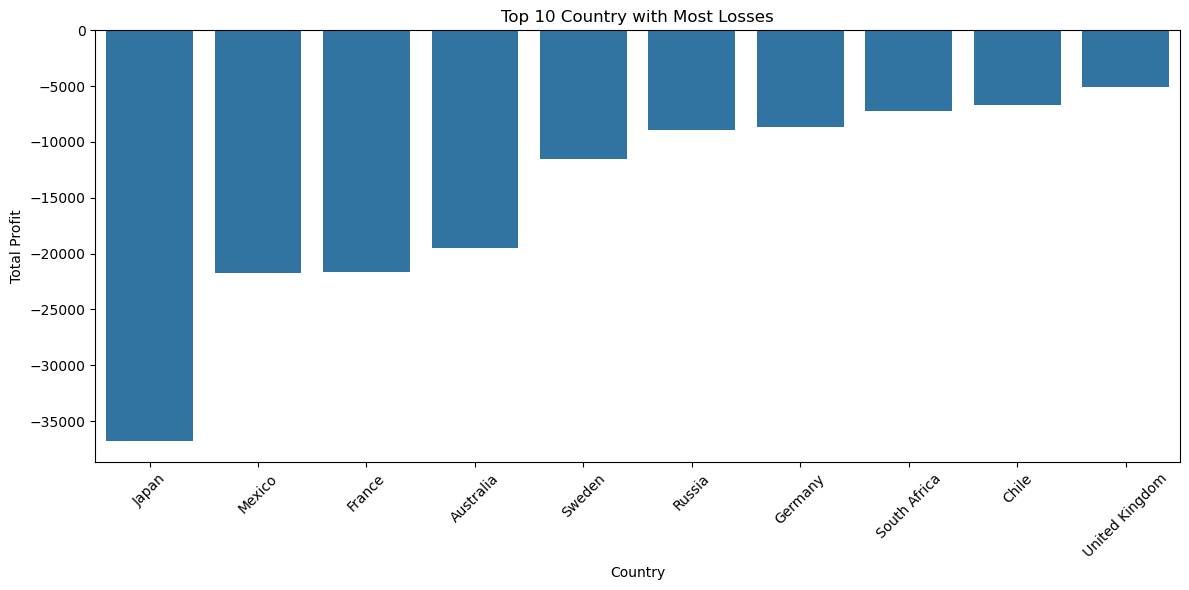

Top Industry by Total Losses:

Industry
Finance             -36294.0884
Tech                -22732.9421
Manufacturing       -19308.6490
Healthcare          -16351.6286
Energy              -15610.9069
Retail              -15546.5872
Consumer Products   -12437.6166
Communications       -8863.5260
Transportation       -8042.4420
Misc                  -942.8989
Name: Profit, dtype: float64


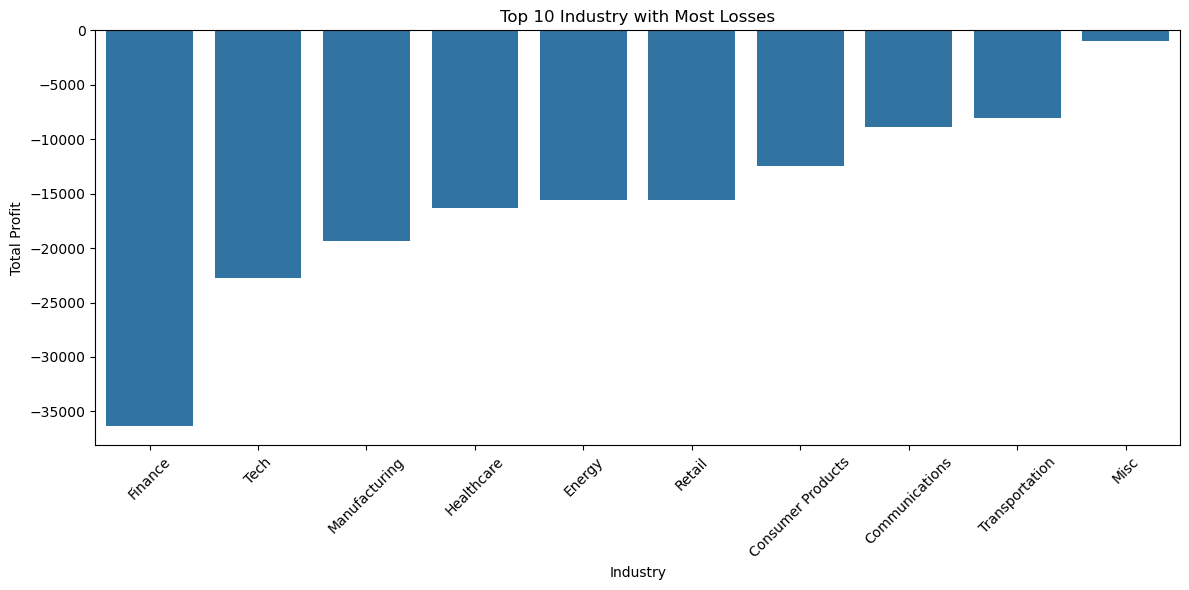

Top Product by Total Losses:

Product
ContactMatcher           -70922.6447
Big Ol Database          -30118.6682
Marketing Suite          -12152.2060
FinanceHub                -9880.8413
OneView                   -8629.6412
Site Analytics            -7530.6235
SaaS Connector Pack       -6490.9134
Marketing Suite - Gold    -6426.3038
Support                   -3015.6219
Data Smasher               -930.6265
Name: Profit, dtype: float64


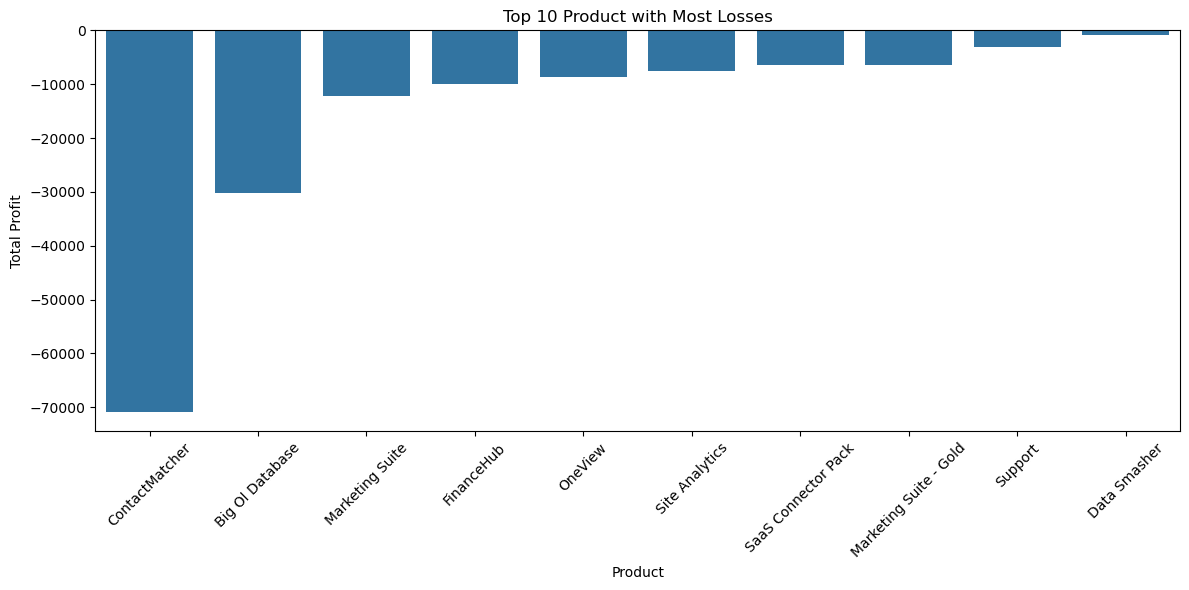

Top Segment by Total Losses:

Segment
SMB          -84945.7112
Strategic    -44787.2076
Enterprise   -26398.3669
Name: Profit, dtype: float64


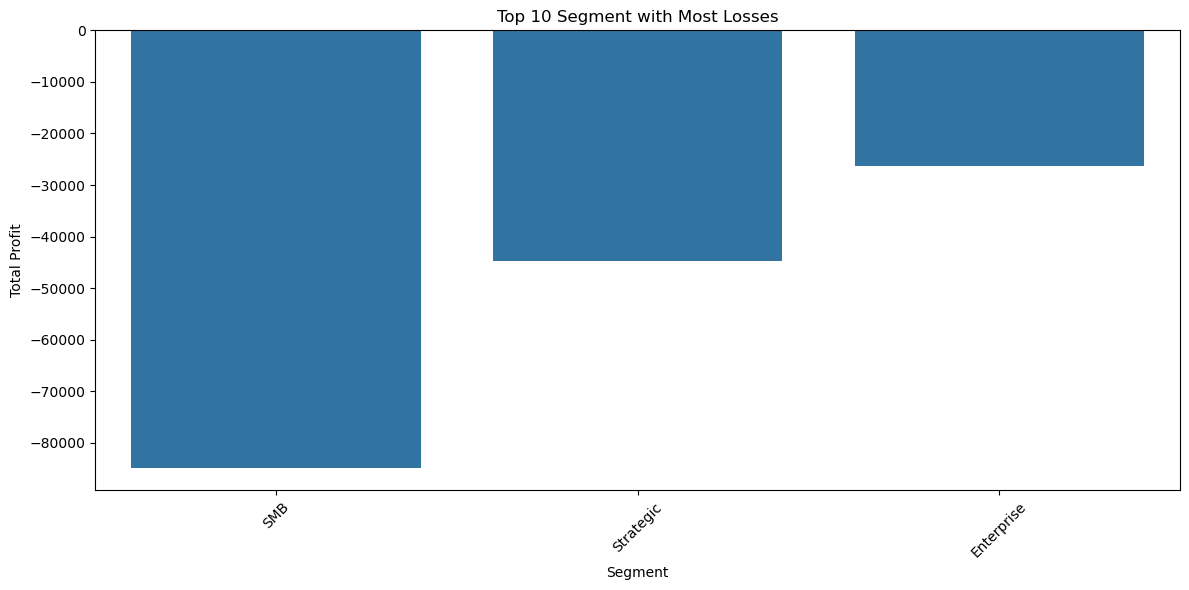

Top Month by Total Losses:

Month
11   -29877.2563
12   -22942.6912
9    -22343.1213
10   -13046.6183
4    -13022.7361
7    -11318.0303
3    -11134.4169
1     -8597.4883
8     -8234.5127
5     -6639.0957
Name: Profit, dtype: float64


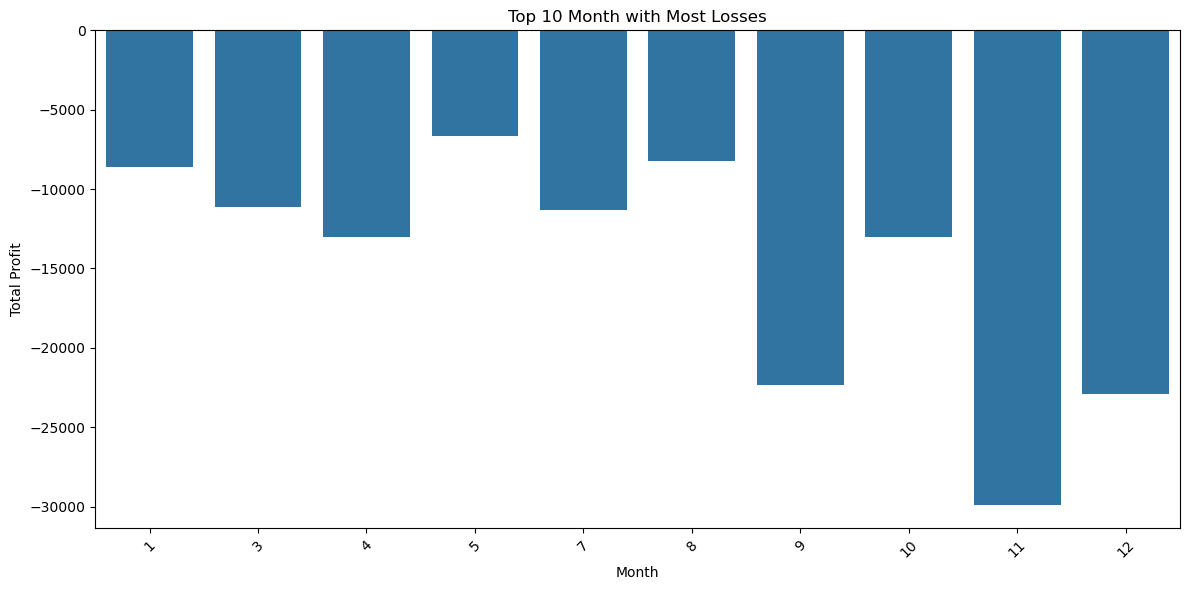

Top Year by Total Losses:

Year
2023   -53871.4086
2022   -37837.7145
2021   -32529.3909
2020   -31892.7717
Name: Profit, dtype: float64


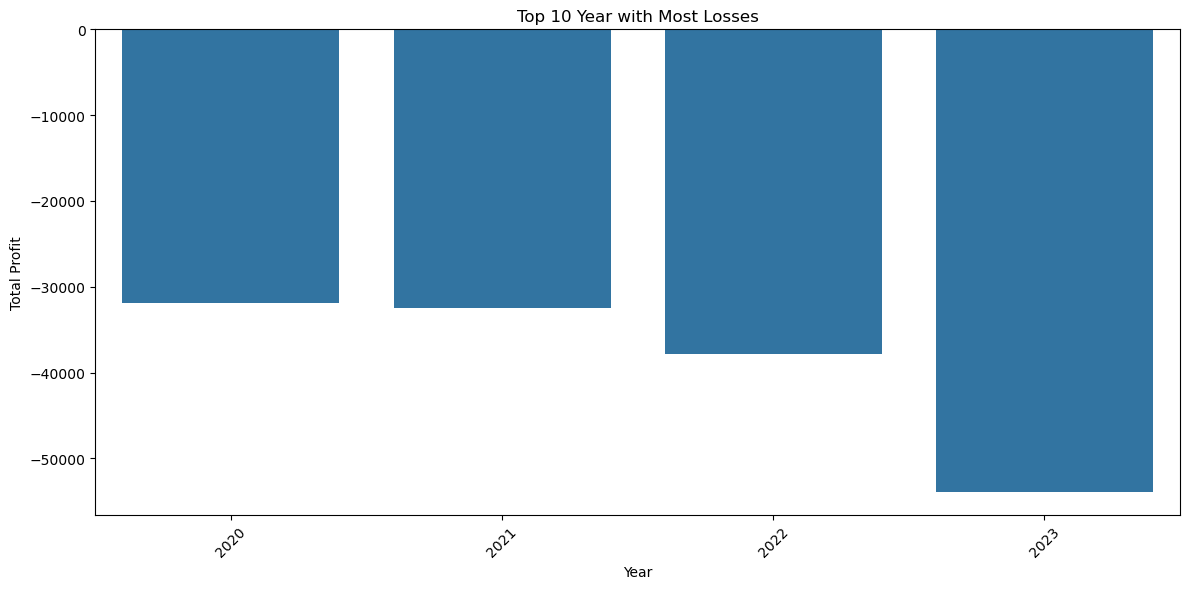

In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year
df_negative=df[df['Profit'] < 0]
def analyze_loss_by(column):
    loss_by_col=df_negative.groupby(column)['Profit'].sum().sort_values()
    print(f"Top {column} by Total Losses:\n")
    print(loss_by_col.head(10))
    plt.figure(figsize=(12,6))
    sns.barplot(x=loss_by_col.head(10).index,y=loss_by_col.head(10).values)
    plt.title(f'Top 10 {column} with Most Losses')
    plt.ylabel('Total Profit')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
analyze_loss_by('Country')
analyze_loss_by('Industry')
analyze_loss_by('Product')
analyze_loss_by('Segment')
analyze_loss_by('Month')
analyze_loss_by('Year')


                Discount      Profit
Country                             
Japan           0.541646 -36813.1875
Mexico          0.472249 -21750.0002
France          0.460791 -21602.8515
Australia       0.564314 -19501.6975
Sweden          0.505882 -11557.9854
Russia          0.521212  -8900.9048
Germany         0.501984  -8689.8295
South Africa    0.456923  -7257.0174
Chile           0.472941  -6656.7675
United Kingdom  0.310638  -5031.1378


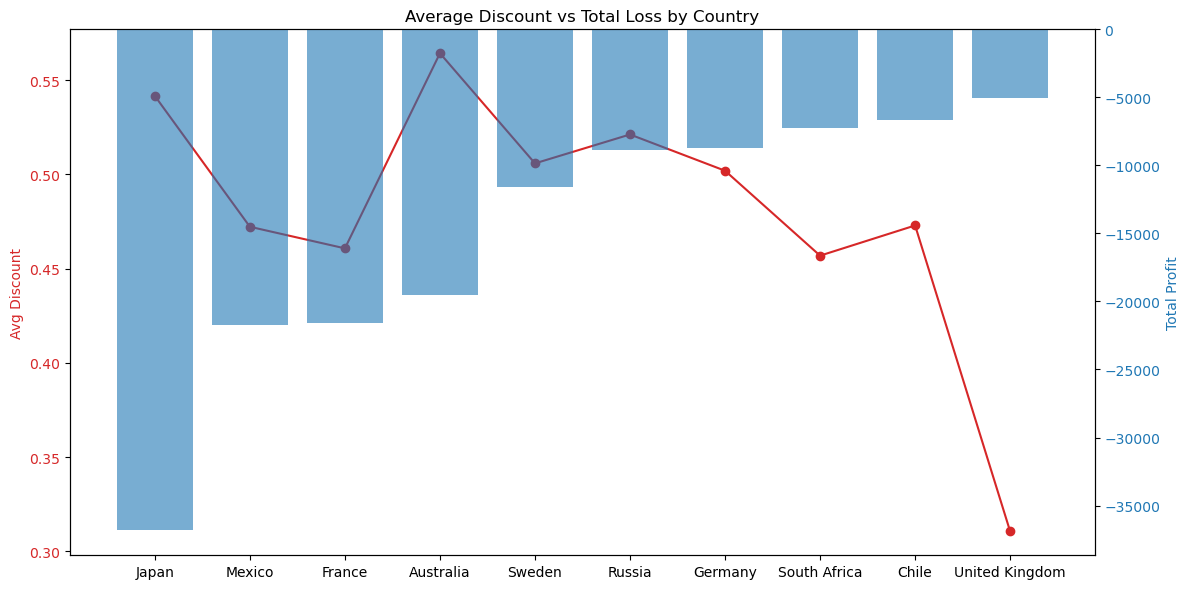

                        Discount      Profit
Product                                     
ContactMatcher          0.645282 -70922.6447
Big Ol Database         0.581818 -30118.6682
Marketing Suite         0.348532 -12152.2060
FinanceHub              0.261277  -9880.8413
OneView                 0.800000  -8629.6412
Site Analytics          0.342647  -7530.6235
SaaS Connector Pack     0.530539  -6490.9134
Marketing Suite - Gold  0.200000  -6426.3038
Support                 0.200000  -3015.6219
Data Smasher            0.200000   -930.6265


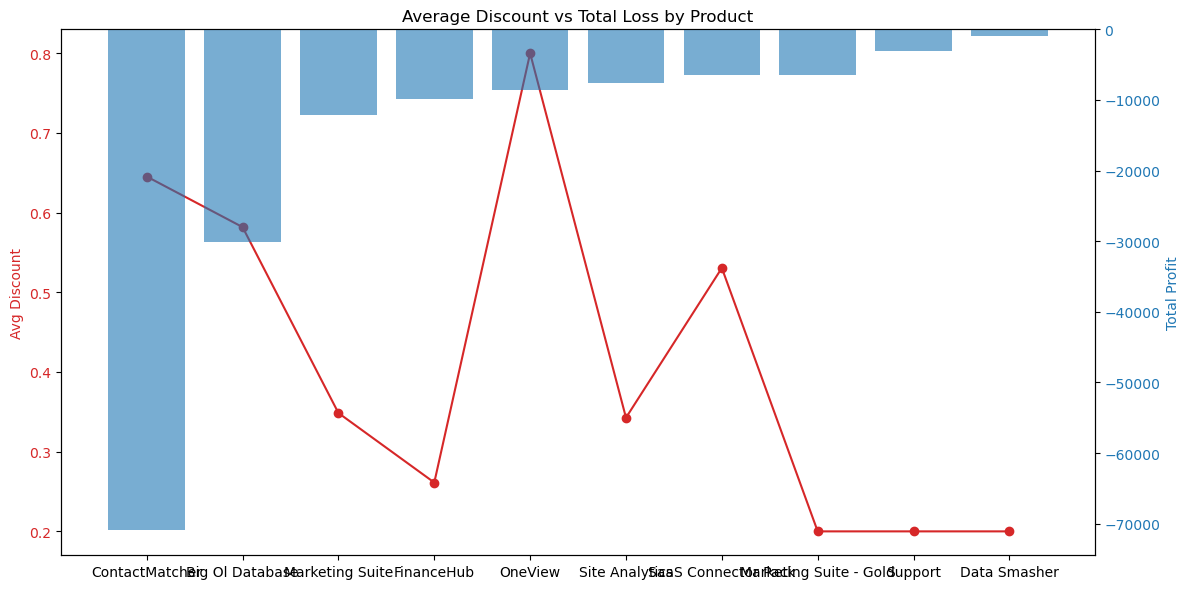

In [5]:
def discount_impact(column):
    discount_loss=df_negative.groupby(column).agg({'Discount': 'mean', 'Profit': 'sum'}).sort_values('Profit')
    print(discount_loss.head(10))
    fig, ax1=plt.subplots(figsize=(12,6))
    color='tab:red'
    ax1.set_ylabel('Avg Discount',color=color)
    ax1.plot(discount_loss.head(10)['Discount'],color=color,marker='o',label='Avg Discount')
    ax1.tick_params(axis='y',labelcolor=color)
    ax2=ax1.twinx()
    color='tab:blue'
    ax2.set_ylabel('Total Profit',color=color)
    ax2.bar(discount_loss.head(10).index, discount_loss.head(10)['Profit'],alpha=0.6,color=color)
    ax2.tick_params(axis='y',labelcolor=color)
    plt.title(f'Average Discount vs Total Loss by {column}')
    fig.tight_layout()
    plt.xticks(rotation=45)
    plt.show()
discount_impact('Country')
discount_impact('Product')


In [89]:
# country_df=df[df['Profit']<0].groupby('Country').agg({
#     'Discount':'mean',
#     'Profit':'sum'
# }).reset_index()
# def classify(row):
#     if row['Discount']>0.5 and row['Profit']<-10000:
#         return('High Loss & High Discount','0')
#     elif row['Discount'] > 0.45:
#         return ('Moderate Risk','0.1')
#     else:
#         return ('Lower Risk','0.2')
# country_df[['Country Group','disccap country']]=country_df.apply(classify,axis=1,result_type='expand')
# summary=country_df.groupby('Country Group').agg({
#     'Country':lambda x:', '.join(sorted(x)),
#     'disccap country':'first'
# }).reset_index().rename(columns={'Country':'Countries'})

# # Step 1: Get the list of countries classified as 'High Loss & High Discount'
# high_loss_countries = country_df[country_df['Country Group'] == 'High Loss & High Discount']['Country']
# medium_loss_countries = country_df[country_df['Country Group'] == 'Moderate Risk']['Country']
# low_loss_countries = country_df[country_df['Country Group'] == 'Lower Risk']['Country']

# # Step 2: Assign disccap country = 0.0 for those countries in df
# df.loc[df['Country'].isin(high_loss_countries), 'disccap country'] = 0
# df.loc[df['Country'].isin(medium_loss_countries), 'disccap country'] = 0.1
# df.loc[df['Country'].isin(low_loss_countries), 'disccap country'] = 0.2

# from tabulate import tabulate
# print(tabulate(summary,headers='keys'))

    Country Group              Countries                                                                                                                                        disccap country
--  -------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------  -----------------
 0  High Loss & High Discount  Australia, Japan, Sweden                                                                                                                                     0
 1  Lower Risk                 Argentina, Canada, China, Greece, Iceland, Israel, New Zealand, Norway, Philippines, Saudi Arabia, South Korea, United Kingdom, United States                0.2
 2  Moderate Risk              Belgium, Chile, France, Germany, Mexico, Russia, South Africa                                                                                                0.1


In [6]:
# Step 1: Filter only rows with positive profit
positive_profit_df = df[df['Profit'] > 0]

# Step 2: Group by Country and get the max discount
country_discount_cap = positive_profit_df.groupby('Country')['Discount'].max().reset_index()
country_discount_cap = country_discount_cap.rename(columns={'Discount': 'disccap_country'})

# Step 3: Merge this cap info into your original df
df = df.merge(country_discount_cap, on='Country', how='left')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Discount,Profit,extractdate,day_of_week,day_of_month,month,year,Original_Price,Price_Range,disccap_country
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,0.00,41.9136,2022-11-09,2,9,11,2022,261.96,201-500,0.0
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,0.00,219.5820,2022-11-09,2,9,11,2022,731.94,501-1000,0.0
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,0.00,6.8714,2022-06-13,0,13,6,2022,14.62,11-20,0.2
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,0.45,-383.0310,2021-10-11,0,11,10,2021,1741.05,1000+,0.2
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,0.20,2.5164,2021-10-11,0,11,10,2021,27.96,21-50,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,0.20,4.1028,2020-01-22,2,22,1,2020,31.56,21-50,0.2
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0.00,15.6332,2023-02-27,0,27,2,2023,91.96,51-100,0.2
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0.20,19.3932,2023-02-27,0,27,2,2023,323.22,201-500,0.2
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0.00,13.3200,2023-02-27,0,27,2,2023,29.60,21-50,0.2


In [ ]:
# industry_df=df[df['Profit']<0].groupby('Industry').agg({
#     'Discount':'mean',
#     'Profit':'sum'
# }).reset_index()
# def classify(row):
#     if row['Discount']>0.5 and row['Profit']<-10000:
#         return('High Loss & High Discount','0')
#     elif row['Discount'] > 0.45:
#         return ('Moderate Risk','0.1')
#     else:
#         return ('Lower Risk','0.2')
# industry_df[['Industry Group','disccap industry']]=industry_df.apply(classify,axis=1,result_type='expand')
# summary=industry_df.groupby('Industry Group').agg({
#     'Industry':lambda x:', '.join(sorted(x)),
#     'disccap industry':'first'
# }).reset_index().rename(columns={'Industry':'Industries'})
# # Step 1: Get the list of countries classified as 'High Loss & High Discount'
# high_loss_industries = industry_df[industry_df['Industry Group'] == 'High Loss & High Discount']['Industry']
# medium_loss_industries = industry_df[industry_df['Industry Group'] == 'Moderate Risk']['Industry']
# low_loss_industries = industry_df[industry_df['Industry Group'] == 'Lower Risk']['Industry']

# # Step 2: Assign disccap country = 0.0 for those countries in df
# df.loc[df['Industry'].isin(high_loss_industries), 'disccap industry'] = 0
# df.loc[df['Industry'].isin(medium_loss_industries), 'disccap industry'] = 0.1
# df.loc[df['Industry'].isin(low_loss_industries), 'disccap industry'] = 0.2

# from tabulate import tabulate
# print(tabulate(summary,headers='keys'))

    Industry Group             Industries                                                                                                   disccap industry
--  -------------------------  ---------------------------------------------------------------------------------------------------------  ------------------
 0  High Loss & High Discount  Retail                                                                                                                    0
 1  Moderate Risk              Communications, Consumer Products, Energy, Finance, Healthcare, Manufacturing, Misc, Tech, Transportation                 0.1


In [7]:
# Step 2: Group by Country and get the max discount
industry_discount_cap = positive_profit_df.groupby('Industry')['Discount'].max().reset_index()
industry_discount_cap = industry_discount_cap.rename(columns={'Discount': 'disccap_industry'})

# Step 3: Merge this cap info into your original df
df = df.merge(industry_discount_cap, on='Industry', how='left')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Profit,extractdate,day_of_week,day_of_month,month,year,Original_Price,Price_Range,disccap_country,disccap_industry
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,41.9136,2022-11-09,2,9,11,2022,261.96,201-500,0.0,0.4
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,219.5820,2022-11-09,2,9,11,2022,731.94,501-1000,0.0,0.4
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,6.8714,2022-06-13,0,13,6,2022,14.62,11-20,0.2,0.4
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,-383.0310,2021-10-11,0,11,10,2021,1741.05,1000+,0.2,0.4
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,2.5164,2021-10-11,0,11,10,2021,27.96,21-50,0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,4.1028,2020-01-22,2,22,1,2020,31.56,21-50,0.2,0.4
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,15.6332,2023-02-27,0,27,2,2023,91.96,51-100,0.2,0.4
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,19.3932,2023-02-27,0,27,2,2023,323.22,201-500,0.2,0.4
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,13.3200,2023-02-27,0,27,2,2023,29.60,21-50,0.2,0.4


In [ ]:
# segment_df=df[df['Profit']<0].groupby('Segment').agg({
#     'Discount':'mean',
#     'Profit':'sum'
# }).reset_index()
# def classify(row):
#     if row['Discount']>0.5 and row['Profit']<-10000:
#         return('High Loss & High Discount','0')
#     elif row['Discount'] > 0.45:
#         return ('Moderate Risk','0.1')
#     else:
#         return ('Lower Risk','0.2')
# segment_df[['Segment Group','disccap segment']]=segment_df.apply(classify,axis=1,result_type='expand')
# summary=segment_df.groupby('Segment Group').agg({
#     'Segment':lambda x:', '.join(sorted(x)),
#     'disccap segment':'first'
# }).reset_index().rename(columns={'Segment':'Segments'})
# # Step 1: Get the list of countries classified as 'High Loss & High Discount'
# high_loss_segments = segment_df[segment_df['Segment Group'] == 'High Loss & High Discount']['Segment']
# medium_loss_segments = segment_df[segment_df['Segment Group'] == 'Moderate Risk']['Segment']
# low_loss_segments = segment_df[segment_df['Segment Group'] == 'Lower Risk']['Segment']

# # Step 2: Assign disccap country = 0.0 for those countries in df
# df.loc[df['Segment'].isin(high_loss_segments), 'disccap segment'] = 0
# df.loc[df['Segment'].isin(medium_loss_segments), 'disccap segment'] = 0.1
# df.loc[df['Segment'].isin(low_loss_segments), 'disccap segment'] = 0.2

# from tabulate import tabulate
# print(tabulate(summary,headers='keys'))

    Segment Group    Segments                      disccap segment
--  ---------------  --------------------------  -----------------
 0  Moderate Risk    Enterprise, SMB, Strategic                0.1


In [8]:
# Step 2: Group by Country and get the max discount
segment_discount_cap = positive_profit_df.groupby('Segment')['Discount'].max().reset_index()
segment_discount_cap = segment_discount_cap.rename(columns={'Discount': 'disccap_segment'})

# Step 3: Merge this cap info into your original df
df = df.merge(segment_discount_cap, on='Segment', how='left')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,extractdate,day_of_week,day_of_month,month,year,Original_Price,Price_Range,disccap_country,disccap_industry,disccap_segment
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,2022-11-09,2,9,11,2022,261.96,201-500,0.0,0.4,0.4
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,2022-11-09,2,9,11,2022,731.94,501-1000,0.0,0.4,0.4
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,2022-06-13,0,13,6,2022,14.62,11-20,0.2,0.4,0.4
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,2021-10-11,0,11,10,2021,1741.05,1000+,0.2,0.4,0.4
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,2021-10-11,0,11,10,2021,27.96,21-50,0.2,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,2020-01-22,2,22,1,2020,31.56,21-50,0.2,0.4,0.4
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,2023-02-27,0,27,2,2023,91.96,51-100,0.2,0.4,0.4
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,2023-02-27,0,27,2,2023,323.22,201-500,0.2,0.4,0.4
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,2023-02-27,0,27,2,2023,29.60,21-50,0.2,0.4,0.4


In [ ]:
# product_df=df[df['Profit']<0].groupby('Product').agg({
#     'Discount':'mean',
#     'Profit':'sum'
# }).reset_index()
# def classify(row):
#     if row['Discount']>0.5 and row['Profit']<-10000:
#         return('High Loss & High Discount','0')
#     elif row['Discount'] > 0.45:
#         return ('Moderate Risk','0.1')
#     else:
#         return ('Lower Risk','0.2')
# product_df[['Product Group','disccap product']]=product_df.apply(classify,axis=1,result_type='expand')
# summary=product_df.groupby('Product Group').agg({
#     'Product':lambda x:', '.join(sorted(x)),
#     'disccap product':'first'
# }).reset_index().rename(columns={'Product':'Products'})
# # Step 1: Get the list of countries classified as 'High Loss & High Discount'
# high_loss_products = product_df[product_df['Product Group'] == 'High Loss & High Discount']['Product']
# medium_loss_products = product_df[product_df['Product Group'] == 'Moderate Risk']['Product']
# low_loss_products = product_df[product_df['Product Group'] == 'Lower Risk']['Product']

# # Step 2: Assign disccap country = 0.0 for those countries in df
# df.loc[df['Product'].isin(high_loss_products), 'disccap product'] = 0
# df.loc[df['Product'].isin(medium_loss_products), 'disccap product'] = 0.1
# df.loc[df['Product'].isin(low_loss_products), 'disccap product'] = 0.2

# from tabulate import tabulate
# print(tabulate(summary,headers='keys'))

    Product Group              Products                                                                                               disccap product
--  -------------------------  ---------------------------------------------------------------------------------------------------  -----------------
 0  High Loss & High Discount  Big Ol Database, ContactMatcher                                                                                    0
 1  Lower Risk                 Data Smasher, FinanceHub, Marketing Suite, Marketing Suite - Gold, Site Analytics, Storage, Support                0.2
 2  Moderate Risk              OneView, SaaS Connector Pack                                                                                       0.1


In [9]:
# Step 2: Group by Country and get the max discount
product_discount_cap = positive_profit_df.groupby('Product')['Discount'].max().reset_index()
product_discount_cap = product_discount_cap.rename(columns={'Discount': 'disccap_product'})

# Step 3: Merge this cap info into your original df
df = df.merge(product_discount_cap, on='Product', how='left')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,day_of_week,day_of_month,month,year,Original_Price,Price_Range,disccap_country,disccap_industry,disccap_segment,disccap_product
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,2,9,11,2022,261.96,201-500,0.0,0.4,0.4,0.2
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,2,9,11,2022,731.94,501-1000,0.0,0.4,0.4,0.2
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,0,13,6,2022,14.62,11-20,0.2,0.4,0.4,0.2
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,0,11,10,2021,1741.05,1000+,0.2,0.4,0.4,0.3
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,0,11,10,2021,27.96,21-50,0.2,0.4,0.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,2,22,1,2020,31.56,21-50,0.2,0.4,0.4,0.2
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0,27,2,2023,91.96,51-100,0.2,0.4,0.4,0.2
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0,27,2,2023,323.22,201-500,0.2,0.4,0.4,0.4
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,0,27,2,2023,29.60,21-50,0.2,0.4,0.4,0.2


In [ ]:
# df['month']=df['month'].astype(str)
# month_df=df[df['Profit']<0].groupby('month').agg({
#     'Discount':'mean',
#     'Profit':'sum'
# }).reset_index()
# def classify(row):
#     if row['Discount']>0.5 and row['Profit']<-10000:
#         return('High Loss & High Discount','0')
#     elif row['Discount'] > 0.45:
#         return ('Moderate Risk','0.1')
#     else:
#         return ('Lower Risk','0.2')
# month_df[['month Group','disccap month']]=month_df.apply(classify,axis=1,result_type='expand')
# summary=month_df.groupby('month Group').agg({
#     'month':lambda x:', '.join(sorted(x)),
#     'disccap month':'first'
# }).reset_index().rename(columns={'month':'months'})
# # Step 1: Get the list of countries classified as 'High Loss & High Discount'
# high_loss_months = month_df[month_df['month Group'] == 'High Loss & High Discount']['month']
# medium_loss_months = month_df[month_df['month Group'] == 'Moderate Risk']['month']
# low_loss_months = month_df[month_df['month Group'] == 'Lower Risk']['month']

# # Step 2: Assign disccap country = 0.0 for those countries in df
# df.loc[df['month'].isin(high_loss_months), 'disccap month'] = 0
# df.loc[df['month'].isin(medium_loss_months), 'disccap month'] = 0.1
# df.loc[df['month'].isin(low_loss_months), 'disccap month'] = 0.2

# from tabulate import tabulate
# print(tabulate(summary,headers='keys'))

    month Group    months                                   disccap month
--  -------------  -------------------------------------  ---------------
 0  Moderate Risk  1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9              0.1


In [10]:
# Step 2: Group by Country and get the max discount
month_discount_cap = positive_profit_df.groupby('month')['Discount'].max().reset_index()
month_discount_cap = month_discount_cap.rename(columns={'Discount': 'disccap_month'})

# Step 3: Merge this cap info into your original df
df = df.merge(month_discount_cap, on='month', how='left')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,day_of_month,month,year,Original_Price,Price_Range,disccap_country,disccap_industry,disccap_segment,disccap_product,disccap_month
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,9,11,2022,261.96,201-500,0.0,0.4,0.4,0.2,0.4
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,9,11,2022,731.94,501-1000,0.0,0.4,0.4,0.2,0.4
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,13,6,2022,14.62,11-20,0.2,0.4,0.4,0.2,0.4
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,11,10,2021,1741.05,1000+,0.2,0.4,0.4,0.3,0.4
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,11,10,2021,27.96,21-50,0.2,0.4,0.4,0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,22,1,2020,31.56,21-50,0.2,0.4,0.4,0.2,0.4
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,27,2,2023,91.96,51-100,0.2,0.4,0.4,0.2,0.2
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,27,2,2023,323.22,201-500,0.2,0.4,0.4,0.4,0.2
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,27,2,2023,29.60,21-50,0.2,0.4,0.4,0.2,0.2


In [11]:
df['Original_Price']=df['Sales']/(1-df['Discount'])
def general_disccap(price):
    if price <= 20:
        return 0.2
    else:
        return 0.4

# Apply the function to create the new column
df['disccap_general'] = df['Original_Price'].apply(general_disccap)

In [12]:
df['disccap_country']=df['disccap_country'].astype(float)
df['disccap_segment']=df['disccap_segment'].astype(float)
df['disccap_product']=df['disccap_product'].astype(float)
df['disccap_industry']=df['disccap_industry'].astype(float)
df['disccap_month']=df['disccap_month'].astype(float)
df['min_disccap'] = df[[
    'disccap_country',
    'disccap_segment',
    'disccap_product',
    'disccap_industry',
    'disccap_month',
    'disccap_general'
]].min(axis=1)
# df['min_disccap'] = df['min_disccap'].fillna(df['Discount'])
df[['Discount','Profit','min_disccap']].head()

,Discount,Profit,min_disccap
0,0.00,41.9136,0.0
1,0.00,219.5820,0.0
2,0.00,6.8714,0.2
3,0.45,-383.0310,0.2
4,0.20,2.5164,0.2


In [13]:
#df['Original_Price']=df['Sales']/(1-df['Discount'])
df['New_Sales']=df['Original_Price']*(1-df['min_disccap'])
df['Estimated_Cost']=df['Sales']-df['Profit']
df['New_Profit']=df['New_Sales']-df['Estimated_Cost']
#df['New_Profit']=df['Original_Price']-df['New_Sales']

In [14]:
df[['Profit','New_Profit']]

,Profit,New_Profit
0,41.9136,41.9136
1,219.5820,219.5820
2,6.8714,3.9474
3,-383.0310,52.2315
4,2.5164,2.5164
...,...,...
9989,4.1028,4.1028
9990,15.6332,-2.7588
9991,19.3932,19.3932
9992,13.3200,7.4000


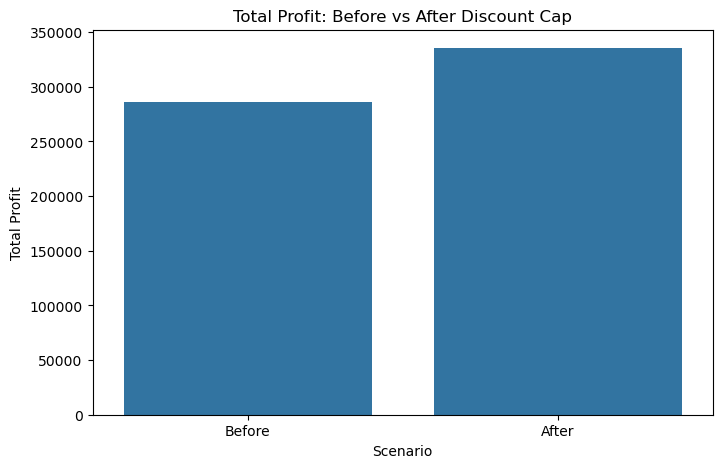

In [15]:
profit_comparison=pd.DataFrame({
    'Scenario':['Before','After'],
    'Total Profit':[
        df['Profit'].sum(),
        df['New_Profit'].sum()
    ],
    # 'Negative Transactions':[
    #     (df['Profit']<0).sum(),
    #     (df['New_Profit']<0).sum()
    # ]
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Scenario',y='Total Profit',data=profit_comparison)
plt.title('Total Profit: Before vs After Discount Cap')
plt.ylabel('Total Profit')
plt.show()
# plt.figure(figsize=(8,5))
# sns.barplot(x='Scenario',y='Negative Transactions',data=profit_comparison)
# plt.title('Count of Loss-Making Transactions: Before vs After Discount Cap')
# plt.ylabel('Number of Loss Transactions')
# plt.show()

In [19]:
display(df['Profit'].sum())
display(df['New_Profit'].sum())
display(df['New_Profit'].sum()/df['Profit'].sum())

286397.0217

335405.66240000003

1.1711213350232965

## **OTHER RECOMMENDATIONS**

Most countries with high losses are first world countries because they have higher expectations from the customers and intense competition and also some developing countries. Thus in order to make their more interesting, SaaS must make a new way of selling. For example create tiered product [For example Big Ol Database : there will be 3 different types of product according to the database storage size. The higher the storage, the more expensive it is]. This way, people can buy it according to their needs. This could fix the problem where people could possibly feel that the products that SaaS sold them is too monotone/too much/too little for their needs and makes them not want the product. Saas also could create bundling products [For example SMB business bundling which features Marketing Suite and Data Smasher with a reduced price]. This could help promote the softwares that are less profitable in the dataset. Also, create a more localized price to help promote this product to a less developing countries as they have a less stable and weaker economy.

The lowest negative profit is found in the SMB (small and medium business) segment which explains itself because it is still a small business. This could happen because they are new to the market and they do not really understand the use of the software being sold by SaaS. So, SaaS should automate onboarding/support (tutorial/explanation on how the software work and how the software could help businesses).

Most negative profits happen in end of year months which could happen as sales team are getting desperate to meet their quotas and so they are aggresively distributing discounts to attract more customers. So instead of promoting using discounts, promote using the features in the tiered product. For example when the product is sold without discount, the software can be shared to 1,5 times more accounts than normal / the software license duration is extended to 2 times more than normal.

<Figure size 1400x600 with 0 Axes>

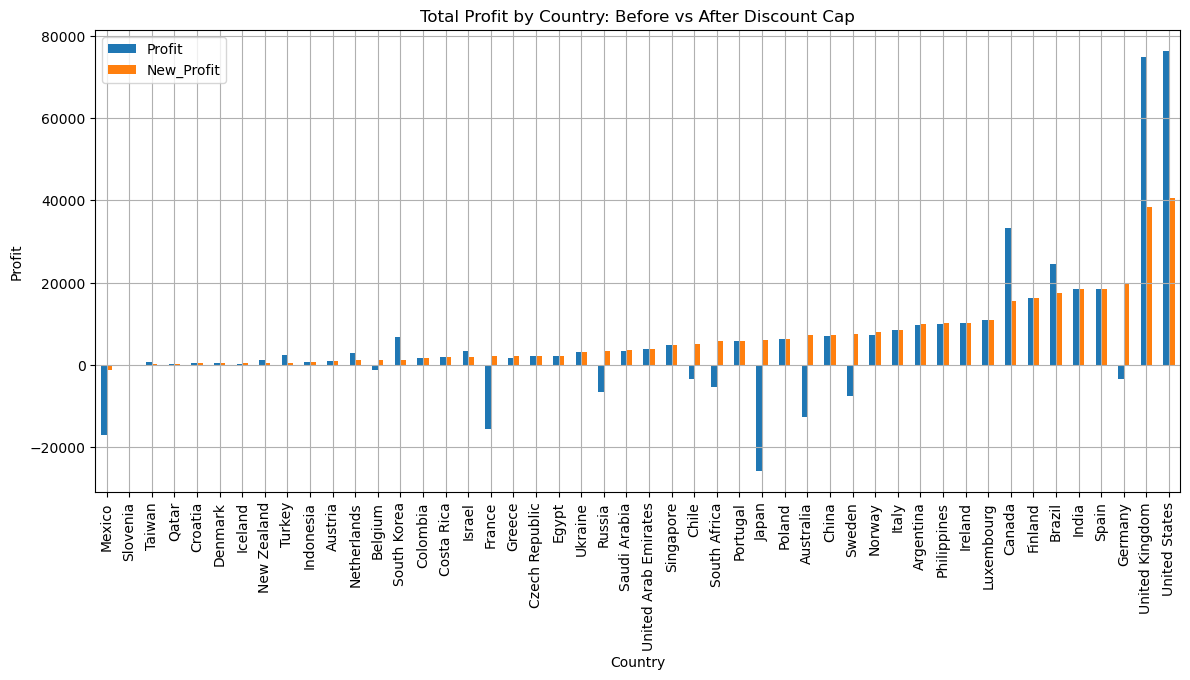

In [207]:
country_comparison=df.groupby('Country')[['Profit','New_Profit']].sum().sort_values(by='New_Profit')
plt.figure(figsize=(14,6))
country_comparison.plot(kind='bar',figsize=(14, 6))
plt.title('Total Profit by Country: Before vs After Discount Cap')
plt.ylabel('Profit')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1400x600 with 0 Axes>

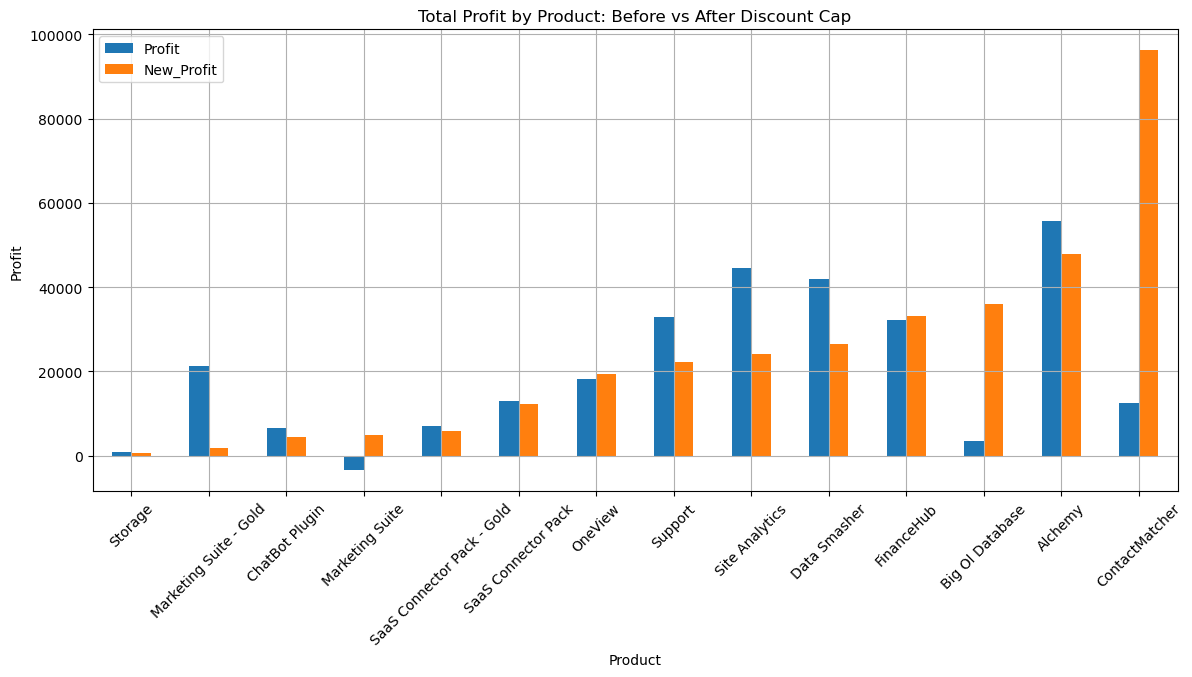

In [208]:
product_comparison=df.groupby('Product')[['Profit','New_Profit']].sum().sort_values(by='New_Profit')
plt.figure(figsize=(14,6))
product_comparison.plot(kind='bar',figsize=(14,6))
plt.title('Total Profit by Product: Before vs After Discount Cap')
plt.ylabel('Profit')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

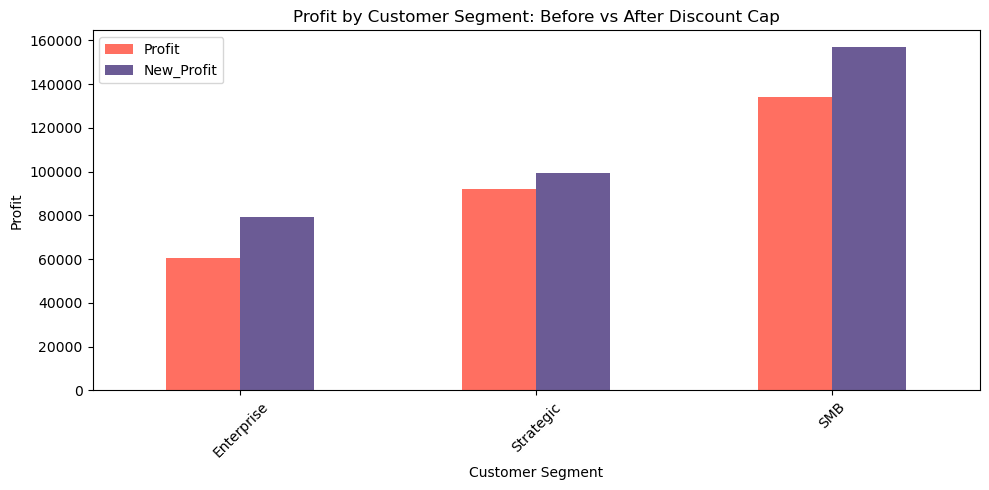

In [209]:
segment_profit=df.groupby('Segment')[['Profit','New_Profit']].sum().sort_values(by='New_Profit')
segment_profit.plot(kind='bar',figsize=(10,5), color=['#FF6F61','#6B5B95'])
plt.title('Profit by Customer Segment: Before vs After Discount Cap')
plt.ylabel('Profit')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

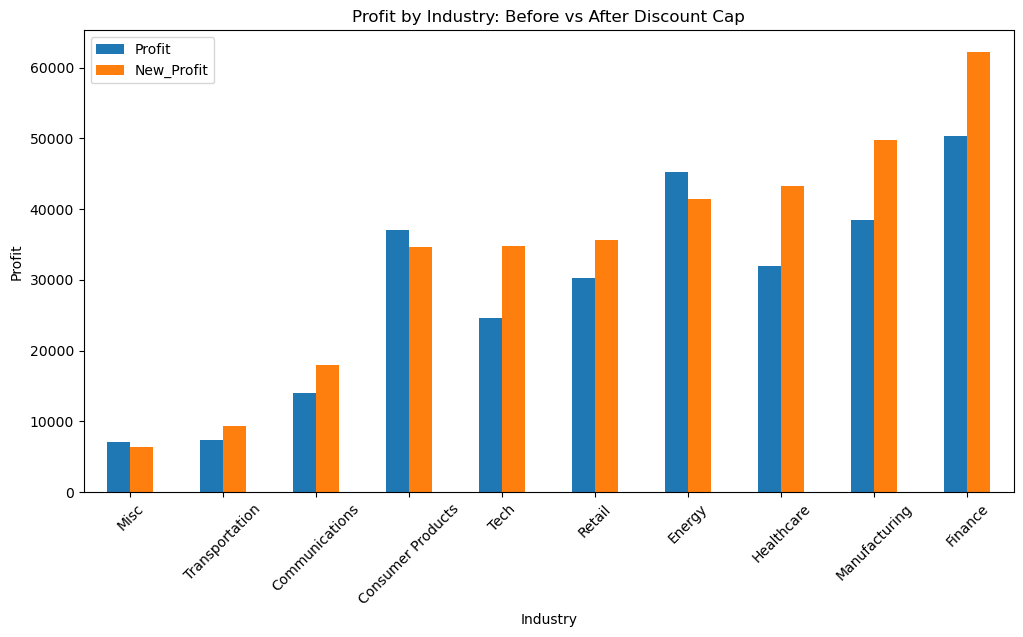

In [210]:
industry_profit=df.groupby('Industry')[['Profit','New_Profit']].sum().sort_values(by='New_Profit')
industry_profit.plot(kind='bar',figsize=(12,6))
plt.title('Profit by Industry: Before vs After Discount Cap')
plt.ylabel('Profit')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()